# 🚗 Vehicle Dataset: Data Cleaning & Feature Engineering

This notebook focuses on preparing the raw vehicle dataset for machine learning.  
We cover two main stages:

## 1. Data Cleaning  
- Handling duplicates and invalid values  
- Detecting and treating outliers  
- Managing missing values  
- Standardizing units and formats  
- Correcting data types  

## 2. Feature Engineering  
- Creating new meaningful features (e.g., vehicle age, mileage per year)  
- Encoding categorical variables  
- Scaling and transforming numerical features  
- Cyclical encoding for time-related features  
- Target encoding for high-cardinality features  

🎯 **Goal:** Ensure the dataset is clean, consistent, and optimized for predictive modeling.


In [797]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


In [798]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\gcar_data.csv")
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [799]:
df.shape

(100000, 15)

In [800]:
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [801]:
df = df.drop("Unnamed: 0" , axis = 1)
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [802]:
df.isna().sum()

brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64

In [803]:
df_clean = df

## 1. Handle Duplicates

In [804]:
df.duplicated().sum()


2752

In [805]:
df[df.duplicated()].head(10)


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
1068,fiat,Fiat 500e,grey,11/2022,2022,33490,87,118,Automatic,Electric,NaN,314 km Reichweite,99.0,BY BOCELLI 42 kWh CO-DRIVER PLUS WINTER LED
2660,ford,Ford Transit Custom,white,06/2023,2023,39850,96,131,Manual,Diesel,"7,5 l/100 km",198 g/km,10.0,Kombi 320 L1 9-SITZE PDC*TEMP*KLIMA
2885,ford,Ford Transit Custom,white,06/2023,2023,39850,96,131,Manual,Diesel,"7,5 l/100 km",198 g/km,10.0,Kombi 320 L1 9-SITZE PDC*TEMP*KLIMA
3160,fiat,Fiat Doblo,white,03/2023,2023,24899,74,101,Manual,Diesel,"5,7 l/100 km",150 g/km,10.0,Multicab L2 1.5 Blue HDI 100PS Klima
3631,audi,Audi A3,blue,05/2023,2023,39288,110,150,Manual,Diesel,"4,3 l/100 km",112 g/km,10.0,Lim 35 TDI 150 2xS line Nav LED Keyl SHZ PDC
3670,ford,Ford Kuga,grey,04/2023,2023,39890,140,190,Automatic,Hybrid,"5,4 l/100 km",123 g/km,59.0,"ST-Line X 2.5l FHEV HEAD-UP,B&O,NAVI,iACC,"
3725,audi,Audi Q2,red,06/2023,2023,28888,81,110,Manual,Petrol,"5,2 l/100 km",132 g/km,10.0,30TFSI 110 adv. Nav CarPlay Klimaaut elHK PDC
3961,jeep,Jeep Compass,black,02/2023,2023,44990,96,131,Automatic,Hybrid,"5,8 l/100 km",133 g/km,50.0,1.5 S MHEV GSE T4 48V +Panorama/e-sitze/LEDER/...
4187,isuzu,Isuzu D-Max,black,05/2023,2023,46988,120,163,Automatic,Diesel,"7,4 l/100 km",235 g/km,10.0,DC 1.9 TD 163 Aut. 4WD V-Cross LED SHZ PDC
4219,ford,Ford Ranger,white,06/2023,2023,44390,151,205,Automatic,Diesel,"8,8 l/100 km",230 g/km,10.0,Wildtrak 2.0 *NEUES MODELL*NAVI*CAM*LED*


In [806]:
df = df.drop_duplicates(subset=["brand", "model", "year", "power_kw", "transmission_type", "fuel_type", "price_in_euro"])


In [807]:
df.duplicated().sum()


0

## 2. Handling Missing Values and Column wise cleaning

### 1) Column Brand

In [808]:
df_clean["brand"].unique()

array(['ford', 'hyundai', 'audi', 'honda', 'kia', 'dacia', 'bmw',
       'citroen', 'alfa-romeo', 'land-rover', 'jaguar', 'dodge', 'fiat',
       'lamborghini', 'mazda', 'isuzu', 'jeep', 'ferrari', 'bentley',
       'maserati', 'daihatsu', 'chevrolet', 'aston-martin', 'cadillac',
       'daewoo', 'chrysler', 'lancia', 'lada', 'infiniti'], dtype=object)

In [809]:
def clean_brand_name(name):
    name = name.lower().strip()
    return name

In [810]:
df_clean["brand"] = df_clean["brand"].astype(str).apply(clean_brand_name)
df_clean["brand"].unique()

array(['ford', 'hyundai', 'audi', 'honda', 'kia', 'dacia', 'bmw',
       'citroen', 'alfa-romeo', 'land-rover', 'jaguar', 'dodge', 'fiat',
       'lamborghini', 'mazda', 'isuzu', 'jeep', 'ferrari', 'bentley',
       'maserati', 'daihatsu', 'chevrolet', 'aston-martin', 'cadillac',
       'daewoo', 'chrysler', 'lancia', 'lada', 'infiniti'], dtype=object)

In [811]:
df_clean["brand"].isna().sum()

0

### 2) Column Model

In [812]:
df_clean["model"].unique()

array(['Ford Kuga', 'Hyundai i10', 'Audi Q4 e-tron', 'Honda CR-V',
       'Kia Sportage', 'Honda Civic', 'Hyundai STARIA', 'Hyundai KONA',
       'Ford Fiesta', 'Dacia Sandero', 'BMW 520', 'BMW X5',
       'Citroen Spacetourer', 'Audi A5', 'Audi A3', 'Kia',
       'Alfa Romeo 147', 'Audi A4', 'Ford Focus', 'Ford EcoSport',
       'Ford Transit', 'Audi A6', 'Hyundai IONIQ', 'Audi Q5',
       'Land Rover Range Rover Sport', 'Kia XCeed', 'BMW X1',
       'Hyundai TUCSON', 'Jaguar F-Pace', 'BMW 730', 'BMW 118',
       'Land Rover Range Rover Evoque', 'Audi A1', 'Kia Optima',
       'BMW 550', 'BMW 114', 'Dodge RAM', 'Ford S-Max', 'Audi A8',
       'BMW M2', 'Audi Q3', 'BMW 218', 'Fiat 124 Spider', 'BMW 225',
       'Lamborghini Huracan', 'Mazda CX-7', 'Alfa Romeo Stelvio',
       'Ford C-Max', 'BMW 430', 'Hyundai i40', 'Citroen C5 Aircross',
       'BMW 525', 'Isuzu D-Max', 'Alfa Romeo Giulietta', 'BMW X3',
       'Dacia Duster', 'Mazda CX-5', 'BMW i3', 'BMW X6', 'Ford F 150',
       'Jeep

In [813]:

def clean_model_name(name):
    name = name.lower().strip()
    name = name.split("/")[0]
    name = re.sub(r"\s+", "_", name)
    return name

df_clean["model"] = df_clean["model"].astype(str).apply(clean_model_name)
df_clean["model"].unique()


array(['ford_kuga', 'hyundai_i10', 'audi_q4_e-tron', 'honda_cr-v',
       'kia_sportage', 'honda_civic', 'hyundai_staria', 'hyundai_kona',
       'ford_fiesta', 'dacia_sandero', 'bmw_520', 'bmw_x5',
       'citroen_spacetourer', 'audi_a5', 'audi_a3', 'kia',
       'alfa_romeo_147', 'audi_a4', 'ford_focus', 'ford_ecosport',
       'ford_transit', 'audi_a6', 'hyundai_ioniq', 'audi_q5',
       'land_rover_range_rover_sport', 'kia_xceed', 'bmw_x1',
       'hyundai_tucson', 'jaguar_f-pace', 'bmw_730', 'bmw_118',
       'land_rover_range_rover_evoque', 'audi_a1', 'kia_optima',
       'bmw_550', 'bmw_114', 'dodge_ram', 'ford_s-max', 'audi_a8',
       'bmw_m2', 'audi_q3', 'bmw_218', 'fiat_124_spider', 'bmw_225',
       'lamborghini_huracan', 'mazda_cx-7', 'alfa_romeo_stelvio',
       'ford_c-max', 'bmw_430', 'hyundai_i40', 'citroen_c5_aircross',
       'bmw_525', 'isuzu_d-max', 'alfa_romeo_giulietta', 'bmw_x3',
       'dacia_duster', 'mazda_cx-5', 'bmw_i3', 'bmw_x6', 'ford_f_150',
       'jeep

In [814]:
brands = [
    'ford', 'hyundai', 'audi', 'honda', 'kia', 'dacia', 'bmw',
    'citroen', 'alfa_romeo', 'land-rover', 'jaguar', 'dodge', 'fiat',
    'lamborghini', 'mazda', 'isuzu', 'jeep', 'ferrari', 'bentley',
    'maserati', 'daihatsu', 'chevrolet', 'aston-martin', 'cadillac',
    'daewoo', 'chrysler', 'lancia', 'lada', 'infiniti'
]

# Remove brand prefix if it exists
def remove_brand(model):
    for brand in brands:
        prefix = brand + "_"
        if model.startswith(prefix):
            return model[len(prefix):]  # cut off the brand
    return model  # if no brand found, keep original

df_clean["model_only"] = df_clean["model"].apply(remove_brand)


In [815]:
df_clean["model_only"].unique()

array(['kuga', 'i10', 'q4_e-tron', 'cr-v', 'sportage', 'civic', 'staria',
       'kona', 'fiesta', 'sandero', '520', 'x5', 'spacetourer', 'a5',
       'a3', 'kia', '147', 'a4', 'focus', 'ecosport', 'transit', 'a6',
       'ioniq', 'q5', 'land_rover_range_rover_sport', 'xceed', 'x1',
       'tucson', 'f-pace', '730', '118', 'land_rover_range_rover_evoque',
       'a1', 'optima', '550', '114', 'ram', 's-max', 'a8', 'm2', 'q3',
       '218', '124_spider', '225', 'huracan', 'cx-7', 'stelvio', 'c-max',
       '430', 'i40', 'c5_aircross', '525', 'd-max', 'giulietta', 'x3',
       'duster', 'cx-5', 'i3', 'x6', 'f_150', 'compass', 'cx-3', '500c',
       'edge', 'logan', 'tipo', 'sq5', 'rs_q8', 'niro', '500', '535',
       'f8_tributo', 'sorento', 'berlingo', 'a4_allroad', 'aventador',
       'land_rover_range_rover', 'stonic', 'transit_custom', 'mondeo',
       'm4', 'renegade', 'i30', '120', 'ceed_', 'z4', 'i20', 'x3_m', 'x4',
       '530', '6', 'q2', 'ducato', '320', 'giulia', 'tt_rs', '135'

In [816]:
# Correction mapping for model_only column
model_corrections = {
    # Land Rover
    "land_rover_range_rover_sport": "range_rover_sport",
    "land_rover_range_rover_evoque": "range_rover_evoque",
    "land_rover_range_rover_velar": "range_rover_velar",
    "land_rover_range_rover": "range_rover",
    "land_rover_discovery_sport": "discovery_sport",
    "land_rover_discovery": "discovery",
    "land_rover_defender": "defender",
    "land_rover_freelander": "freelander",

    # Kia
    "ceed_": "ceed",
    "ceed_sw_": "ceed_sw",
    "proceed_": "proceed",

    # Ford
    "f_150": "f150",
    "f_250": "f250",
    "f_350": "f350",

    # BMW
    "bmw": None,   # drop invalid standalone brand rows
    "1er_m_coupé": "1m_coupe",

    # Audi
    "rs_q8": "rsq8",
    "rs_q3": "rsq3",
    "tt_rs": "ttrs",
    "tt": "tt",  # keep
    "audi": None,

    # Hyundai
    "h-1": "h1",
    "h_350": "h350",
    "ix35": "ix35",
    "ix55": "ix55",
    "ioniq_5": "ioniq5",
    "ioniq_6": "ioniq6",
    "kona_elektro": "kona_electric",

    # Aston Martin cleanup
    "aston_martin_db7": "db7",
    "aston_martin_db9": "db9",
    "aston_martin_db11": "db11",
    "aston_martin_dbs": "dbs",
    "aston_martin_dbx": "dbx",
    "aston_martin_v8": "v8",
    "aston_martin_vantage": "vantage",
    "aston_martin_vanquish": "vanquish",
    "aston_martin_rapide": "rapide",
    "aston_martin_virage": "virage",

    # Other common fixes
    "mustang_mach-e": "mustang_mach_e",
    "grand_c4_picasso": "c4_grand_picasso",
    "grand_c4_spacetourer": "c4_grand_spacetourer",
    "continental_gt": "continental_gt",
    "continental_gtc": "continental_gtc",
    "grand_tourneo": "tourneo_grand"
}


In [817]:
# Apply corrections
df_clean["model_only"] = df_clean["model_only"].replace(model_corrections)

# Optional: Drop invalid rows where we mapped to None
df_clean = df_clean.dropna(subset=["model_only"])


In [818]:
df_clean["model_only"].unique()

array(['kuga', 'i10', 'q4_e-tron', 'cr-v', 'sportage', 'civic', 'staria',
       'kona', 'fiesta', 'sandero', '520', 'x5', 'spacetourer', 'a5',
       'a3', 'kia', '147', 'a4', 'focus', 'ecosport', 'transit', 'a6',
       'ioniq', 'q5', 'range_rover_sport', 'xceed', 'x1', 'tucson',
       'f-pace', '730', '118', 'range_rover_evoque', 'a1', 'optima',
       '550', '114', 'ram', 's-max', 'a8', 'm2', 'q3', '218',
       '124_spider', '225', 'huracan', 'cx-7', 'stelvio', 'c-max', '430',
       'i40', 'c5_aircross', '525', 'd-max', 'giulietta', 'x3', 'duster',
       'cx-5', 'i3', 'x6', 'f150', 'compass', 'cx-3', '500c', 'edge',
       'logan', 'tipo', 'sq5', 'rsq8', 'niro', '500', '535', 'f8_tributo',
       'sorento', 'berlingo', 'a4_allroad', 'aventador', 'range_rover',
       'stonic', 'transit_custom', 'mondeo', 'm4', 'renegade', 'i30',
       '120', 'ceed', 'z4', 'i20', 'x3_m', 'x4', '530', '6', 'q2',
       'ducato', '320', 'giulia', 'ttrs', '135', 'q7', '318',
       'continental', 

In [819]:
df_clean["model_only"] = df_clean["model_only"].str.replace("_", "-", regex=False)

In [820]:
# Combine brand and model_only into a new column
df_clean["cleaned_names"] = df_clean["brand"].str.lower() + "_" + df_clean["model_only"].str.lower()
df_clean["cleaned_names"].unique()

array(['ford_kuga', 'hyundai_i10', 'audi_q4-e-tron', 'honda_cr-v',
       'kia_sportage', 'honda_civic', 'hyundai_staria', 'hyundai_kona',
       'ford_fiesta', 'dacia_sandero', 'bmw_520', 'bmw_x5',
       'citroen_spacetourer', 'audi_a5', 'audi_a3', 'kia_kia',
       'alfa-romeo_147', 'audi_a4', 'ford_focus', 'ford_ecosport',
       'ford_transit', 'audi_a6', 'hyundai_ioniq', 'audi_q5',
       'land-rover_range-rover-sport', 'kia_xceed', 'bmw_x1',
       'hyundai_tucson', 'jaguar_f-pace', 'bmw_730', 'bmw_118',
       'land-rover_range-rover-evoque', 'audi_a1', 'kia_optima',
       'bmw_550', 'bmw_114', 'dodge_ram', 'ford_s-max', 'audi_a8',
       'bmw_m2', 'audi_q3', 'bmw_218', 'fiat_124-spider', 'bmw_225',
       'lamborghini_huracan', 'mazda_cx-7', 'alfa-romeo_stelvio',
       'ford_c-max', 'bmw_430', 'hyundai_i40', 'citroen_c5-aircross',
       'bmw_525', 'isuzu_d-max', 'alfa-romeo_giulietta', 'bmw_x3',
       'dacia_duster', 'mazda_cx-5', 'bmw_i3', 'bmw_x6', 'ford_f150',
       'j

In [821]:
df_clean["model"] =df_clean["cleaned_names"]
df_clean = df_clean.drop(columns =["model_only","cleaned_names"], axis = 1)
df_clean.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [822]:
df_clean["model"].isna().sum()

0

### 3) Column year

In [823]:
df_clean["year"].unique()

array(['2023', '2018', '2021', '2009', '2019', '2012', '2022', '2016',
       '2005', '1999', '2015', '2004', '2020', '2011', '2017', '2010',
       '2013', '2014', '2007', '2003', '2008', '2001', '1998', '2002',
       '2000', '2006', '1995', '1997', '1996', 'Manual', 'Petrol',
       'Diesel', '04/2017', 'Automatic', '113.000 km', '05/2017',
       'Hybrid', '3700', 'Electric', '01/2019', '06/2021', '8.000 km',
       '02/2020', '04/2006', 'LPG', '07/2021', '32.250 km', '03/2023',
       '12/2003'], dtype=object)

In [824]:
def clean_year(value):
    val = str(value).strip()
    
    if val.isdigit():
        year = int(val)
        if 1950 <= year <= 2025:
            return year
    match = re.search(r"(\d{4})", val)
    if match:
        year = int(match.group(1))
        if 1950 <= year <= 2025:
            return year
    return np.nan

df_clean["year"] = df_clean["year"].apply(clean_year)

df_clean["year"].unique()

array([2023., 2018., 2021., 2009., 2019., 2012., 2022., 2016., 2005.,
       1999., 2015., 2004., 2020., 2011., 2017., 2010., 2013., 2014.,
       2007., 2003., 2008., 2001., 1998., 2002., 2000., 2006., 1995.,
       1997., 1996.,   nan])

In [825]:
df_clean["year"].unique()

array([2023., 2018., 2021., 2009., 2019., 2012., 2022., 2016., 2005.,
       1999., 2015., 2004., 2020., 2011., 2017., 2010., 2013., 2014.,
       2007., 2003., 2008., 2001., 1998., 2002., 2000., 2006., 1995.,
       1997., 1996.,   nan])

In [826]:
df_clean["year"].isna().sum()

44

### 4) Column price_in_euro  

In [827]:
df_clean["price_in_euro"].unique()

array(['38490', '11555', '48886', ..., '27555', '66930', '50299'],
      dtype=object)

In [828]:
mask_non_numeric = df_clean["price_in_euro"].astype(str).str.contains(r"[^0-9]")
bad_rows = df_clean[mask_non_numeric]
bad_rows["price_in_euro"].unique()

array(['AHK', ' 62.000km', ' AC-Schnitzer 360 PS', ' Style',
       ' LED+AHVK+Na', ' Klima!  TÜV neu!', ' Matrix ', ' leder',
       'Automatik', ' Remus Sport', 'Winter', 'ROSTFREI', 'LEDER',
       ' 258 PS TÜV 07/24', 'VOLL LED', ' LED', ' 4-J.GARANTIE',
       'ROSTHREI', '6-Gang', ' UPE \x80 103', ' GARANTIE', ' Unfallfrei',
       ' PP', 'Navigation', 'Inkl-2.Jahre Garantie', ' Sofort Verfügbar',
       'Deutsch', '5 t', '  Navigation', 'Navi', ' AzV und Fahrradträger',
       ' Leder *sofort verfügbar*', ' NAVplus LEDER PANO ALC',
       'AHK schwenkbar', '5L/ o.TÜV / 5 trg',
       ' 4x4 mit hoher Anhängelast*', ' Panoramdach', 'amp', ' Navi',
       'TÜV NEU', ' KLIMAAUTOMATIK*', ' Scheckheft **',
       ' AAC/ NAV/ LEDER/ SHZ/ GRA', ' TÜV NEU',
       ' XEN AAC SHZ FSP APS 5TRG', ' NAVpro HUD HiFi AHK..',
       ' Klimaaut+Parkpil', ' 8 x Räder', 'SYNC 4', ' Klima', ' 8xREIFEN'],
      dtype=object)

In [829]:
df_clean["price_in_euro"] = pd.to_numeric(df_clean["price_in_euro"], errors="coerce")
df_clean["price_in_euro"].unique()

array([38490., 11555., 48886., ..., 27555., 66930., 50299.])

In [830]:
df_clean["price_in_euro"].describe()

count    9.981400e+04
mean     2.938809e+04
std      4.777309e+04
min      1.500000e+02
25%      1.290000e+04
50%      2.047000e+04
75%      3.245000e+04
max      5.890500e+06
Name: price_in_euro, dtype: float64

In [831]:
Q1 = df_clean["price_in_euro"].quantile(0.25)
Q3 = df_clean["price_in_euro"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean["price_in_euro"] < lower_bound) | 
                    (df_clean["price_in_euro"] > upper_bound)]

In [832]:
outliers.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
11,bmw,bmw_x5,blue,07/2022,2022.0,87800.0,290,394,Automatic,Hybrid,NaN,99 km Reichweite,21674.0,xDrive45e M Sport h&k AHK Pano Laser ACC PA
24,bmw,bmw_x5,blue,07/2021,2021.0,68990.0,245,333,Automatic,Petrol,"8,4 l/100 km",192 g/km,19788.0,xDrive40i M Sport 20'' H/K Pano StHzg AHK Lase...
38,land-rover,land-rover_range-rover-evoque,grey,06/2023,2023.0,63900.0,147,200,Automatic,Petrol,"9,3 l/100 km",211 g/km,1500.0,"2.0 Benzin P200 R-Dynamic SE,"
56,lamborghini,lamborghini_huracan,red,08/2018,2018.0,334900.0,471,640,Automatic,Petrol,"12,3 l/100 km",285 g/km,13819.0,Performante Spyder LP 640-4
92,audi,audi_sq5,black,08/2018,2018.0,178000.0,260,354,Automatic,Petrol,"8,3 l/100 km",- (g/km),18500.0,3.0 TFSI quattro/HUD/B&O/360°/Luftfed./Distr


In [833]:
percentiles = df_clean["price_in_euro"].quantile([0.90, 0.95, 0.99, 0.995, 1.0])
print(percentiles)


0.900      50990.0
0.950      69980.0
0.990     229797.4
0.995     299900.0
1.000    5890500.0
Name: price_in_euro, dtype: float64


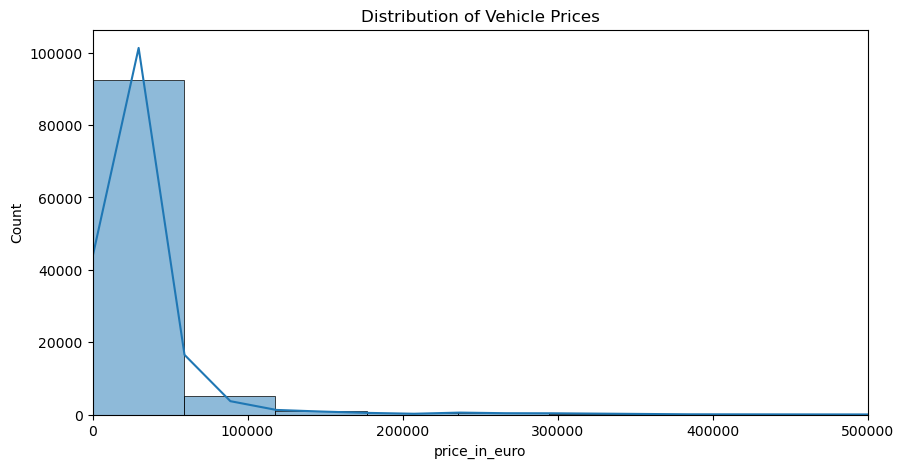

In [834]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_clean["price_in_euro"], bins=100, kde=True)
plt.xlim(0, 500000)  # zoom in (adjust this threshold)
plt.title("Distribution of Vehicle Prices")
plt.show()


In [835]:
upper_cap = df_clean["price_in_euro"].quantile(0.995)
df_clean = df_clean[df_clean["price_in_euro"] <= upper_cap]

In [836]:
percentiles = df_clean["price_in_euro"].quantile([0.90, 0.95, 0.99, 0.995, 1.0])
print(percentiles)


0.900     49980.00
0.950     67880.00
0.990    155888.73
0.995    229900.00
1.000    299900.00
Name: price_in_euro, dtype: float64


In [837]:
df_clean["price_in_euro"].isna().sum()

0

### 5) Column transmission_type 

In [838]:
df_clean["transmission_type"].unique()

array(['Automatic', 'Manual', 'Unknown', 'Semi-automatic'], dtype=object)

In [839]:
df_clean["transmission_type"] = (
    df_clean["transmission_type"]
    .str.lower()
    .replace("unknown", np.nan)
)
df_clean["transmission_type"].unique()

array(['automatic', 'manual', nan, 'semi-automatic'], dtype=object)

In [840]:
df_clean["transmission_type"].isna().sum()

491

In [841]:
mode_transmission = (
    df_clean.groupby(["model", "year"])["transmission_type"]
    .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)

# Step 2: replace NaNs using that mapping
df_clean.loc[df_clean["transmission_type"].isna(), "transmission_type"] = (
    df_clean.loc[df_clean["transmission_type"].isna(), ["model", "year"]]
    .apply(lambda row: mode_transmission.get((row["model"], row["year"])), axis=1)
)

In [842]:
df_clean["transmission_type"].isna().sum()

8

In [843]:
mode_transmission_year = (
    df_clean.groupby("year")["transmission_type"]
    .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)

# Step 2: replace NaNs using the year-level mode
df_clean.loc[df_clean["transmission_type"].isna(), "transmission_type"] = (
    df_clean.loc[df_clean["transmission_type"].isna(), "year"]
    .map(mode_transmission_year)
)

In [844]:
df_clean["transmission_type"].isna().sum()

0

### 6) Column fuel_type 

In [845]:
df_clean["fuel_type"].unique()

array(['Hybrid', 'Petrol', 'Electric', 'Diesel', 'LPG', 'Diesel Hybrid',
       'Other', 'CNG', 'Unknown', 'Hydrogen', 'Ethanol'], dtype=object)

In [846]:
valid_fuels = [
    "petrol", "diesel", "electric", "hybrid",
    "diesel_hybrid", "lpg", "cng", "hydrogen", "ethanol"
]

df_clean["fuel_type"] = (
    df_clean["fuel_type"]
    .str.lower()                               # lowercase
    .str.strip()                               # remove leading/trailing spaces
    .str.replace(" ", "_", regex=True)         # replace spaces with underscores
    .apply(lambda x: x if x in valid_fuels else np.nan)  # keep only valid fuels
)


In [847]:
df_clean["fuel_type"].unique()

array(['hybrid', 'petrol', 'electric', 'diesel', 'lpg', 'diesel_hybrid',
       nan, 'cng', 'hydrogen', 'ethanol'], dtype=object)

In [848]:
df_clean["fuel_type"].isna().sum()

127

In [849]:
df_clean = df_clean.reset_index(drop=True)


year_mode = (
    df_clean.groupby("year")["fuel_type"]
    .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)


df_clean.loc[df_clean["fuel_type"].isna(), "fuel_type"] = (
    df_clean.loc[df_clean["fuel_type"].isna(), "year"].map(year_mode)
)


In [850]:
df_clean["fuel_type"].unique()

array(['hybrid', 'petrol', 'electric', 'diesel', 'lpg', 'diesel_hybrid',
       'cng', 'hydrogen', 'ethanol'], dtype=object)

In [851]:
df_clean["fuel_type"].isna().sum()

0

### 7) Column fuel_consumption_g_km

In [852]:
df_clean["fuel_consumption_g_km"].unique()

array(['124 g/km', '106 g/km', '0 g/km', '175 g/km', '150 g/km',
       '155 g/km', '232 g/km', '125 g/km', '129 g/km', '113 g/km',
       '- (g/km)', '99 km Reichweite', '119 g/km', '59 km Reichweite',
       '170 g/km', '196 g/km', '226 g/km', '120 g/km', '199 g/km',
       '280 km Reichweite', '189 g/km', '192 g/km', '123 g/km',
       '183 g/km', '139 g/km', '122 g/km', '166 g/km', '127 g/km',
       '117 g/km', '165 g/km', '153 g/km', '211 g/km', '107 g/km',
       '224 g/km', '114 g/km', '176 g/km', '145 g/km', '201 g/km',
       '185 g/km', '134 g/km', '116 g/km', '148 g/km', '57 g/km',
       '156 g/km', '149 g/km', '159 g/km', '160 g/km', '195 g/km',
       '157 g/km', '206 g/km', '136 g/km', '115 g/km', '154 g/km',
       '103 g/km', '276 g/km', '161 g/km', '146 g/km', '180 g/km',
       '289 g/km', '112 g/km', '234 g/km', '140 g/km', '121 g/km',
       '118 g/km', '169 g/km', '41 g/km', '137 g/km', '207 g/km',
       '91 g/km', '143 g/km', '248 g/km', '179 g/km', '130 g/km',

In [853]:

fuel_vals = df_clean["fuel_consumption_g_km"].astype(str).str.lower()


mask_reichweite = fuel_vals.str.contains("reichweite", na=False)


mask_both = fuel_vals.str.contains("reichweite", na=False) & fuel_vals.str.contains("g/km", na=False)


print("🔹 Total rows with Reichweite:", mask_reichweite.sum())
print("🔹 Total rows with Reichweite + g/km:", mask_both.sum())

print("\nExamples with Reichweite only:")
print(df_clean.loc[mask_reichweite & ~mask_both, "fuel_consumption_g_km"].unique()[:10])

print("\nExamples with Reichweite + g/km:")
print(df_clean.loc[mask_both, "fuel_consumption_g_km"].unique()[:10])


🔹 Total rows with Reichweite: 1706
🔹 Total rows with Reichweite + g/km: 0

Examples with Reichweite only:
['99 km Reichweite' '59 km Reichweite' '280 km Reichweite'
 '230 km Reichweite' '260 km Reichweite' '505 km Reichweite'
 '264 km Reichweite' '74 km Reichweite' '60 km Reichweite'
 '46 km Reichweite']

Examples with Reichweite + g/km:
[]


In [854]:

reichweite_rows = df_clean[mask_reichweite]
fuel_type_counts = reichweite_rows["fuel_type"].value_counts(dropna=False)

print("Fuel type distribution for Reichweite vehicles:")
print(fuel_type_counts)


Fuel type distribution for Reichweite vehicles:
fuel_type
electric    1225
hybrid       454
petrol        25
diesel         2
Name: count, dtype: int64


In [855]:
for i in ["electric" , "hybrid" ,"petrol","diesel"]:
    print(f"Total {i} vehicals :",
           df_clean[df_clean["fuel_type"] == i].shape[0])


Total electric vehicals : 2440
Total hybrid vehicals : 4262
Total petrol vehicals : 53868
Total diesel vehicals : 37582


In [856]:
df_clean[df_clean["fuel_type"] == "petrol"]["fuel_consumption_g_km"].isna().sum()

0

In [857]:
df_clean.loc[
    mask_reichweite & df_clean["fuel_type"].isin(["petrol", "diesel"]),
    "fuel_consumption_g_km"
] = np.nan


In [858]:

# Step 1: create ev_range_km column (extract numeric if 'Reichweite' in value)
df_clean["ev_range_km"] = (
    df_clean["fuel_consumption_g_km"]
    .str.extract(r"(\d+)")   # extract digits
    .astype(float)
)

# Keep ev_range only if fuel_type is electric or hybrid AND value contains Reichweite
mask_ev_range = mask_reichweite & df_clean["fuel_type"].isin(["electric", "hybrid"])
df_clean.loc[~mask_ev_range, "ev_range_km"] = np.nan   # drop ranges for other types

# Step 2: reset fuel_consumption_g_km to NaN for those rows (since it's not g/km)
df_clean.loc[mask_ev_range, "fuel_consumption_g_km"] = np.nan


print(df_clean[["fuel_type", "fuel_consumption_g_km", "ev_range_km"]].head(20))


   fuel_type fuel_consumption_g_km  ev_range_km
0     hybrid              124 g/km          NaN
1     petrol              106 g/km          NaN
2   electric                0 g/km          NaN
3     petrol              175 g/km          NaN
4     petrol              150 g/km          NaN
5     petrol              155 g/km          NaN
6     diesel              232 g/km          NaN
7     petrol              125 g/km          NaN
8     petrol              129 g/km          NaN
9     petrol              113 g/km          NaN
10    diesel              - (g/km)          NaN
11    hybrid                   NaN         99.0
12    diesel              - (g/km)          NaN
13    diesel              119 g/km          NaN
14    hybrid                   NaN         59.0
15    petrol              170 g/km          NaN
16    petrol              196 g/km          NaN
17    petrol              226 g/km          NaN
18    diesel              - (g/km)          NaN
19    petrol              120 g/km      

In [859]:
# 1. For electric vehicles → fuel_consumption_g_km = 0
df_clean.loc[df_clean["fuel_type"] == "electric", "fuel_consumption_g_km"] = 0

# 2. For petrol/diesel/other (NOT electric/hybrid) → ev_range_km = 0
df_clean.loc[~df_clean["fuel_type"].isin(["electric", "hybrid"]), "ev_range_km"] = 0


print(df_clean[["fuel_type","fuel_consumption_g_km", "ev_range_km"]].head(10))


  fuel_type fuel_consumption_g_km  ev_range_km
0    hybrid              124 g/km          NaN
1    petrol              106 g/km          0.0
2  electric                     0          NaN
3    petrol              175 g/km          0.0
4    petrol              150 g/km          0.0
5    petrol              155 g/km          0.0
6    diesel              232 g/km          0.0
7    petrol              125 g/km          0.0
8    petrol              129 g/km          0.0
9    petrol              113 g/km          0.0


In [860]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].unique()

array([ nan,  99.,  59.,  74.,  60.,  46.,  57.,  45.,  50.,  72.,  56.,
        51.,  55.,  40.,  44.,  58.,  54.,  41.,  47.,  88., 499.,  67.,
       225.,  62.,  48.,  49.,  53.,  68., 109.,  65.,  52.,  37.,  39.,
        43.,  63.,  71.,  61.,  42.,  70.,  69., 480.,  84.,  64., 250.,
        92., 456.,  91.,  87., 320., 395.,  66., 433.,   1.,  33., 110.,
       230., 420.,  93., 280.])

In [861]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].unique()

array([ nan,  99.,  59.,  74.,  60.,  46.,  57.,  45.,  50.,  72.,  56.,
        51.,  55.,  40.,  44.,  58.,  54.,  41.,  47.,  88., 499.,  67.,
       225.,  62.,  48.,  49.,  53.,  68., 109.,  65.,  52.,  37.,  39.,
        43.,  63.,  71.,  61.,  42.,  70.,  69., 480.,  84.,  64., 250.,
        92., 456.,  91.,  87., 320., 395.,  66., 433.,   1.,  33., 110.,
       230., 420.,  93., 280.])

In [862]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].unique()

array([ nan,  99.,  59.,  74.,  60.,  46.,  57.,  45.,  50.,  72.,  56.,
        51.,  55.,  40.,  44.,  58.,  54.,  41.,  47.,  88., 499.,  67.,
       225.,  62.,  48.,  49.,  53.,  68., 109.,  65.,  52.,  37.,  39.,
        43.,  63.,  71.,  61.,  42.,  70.,  69., 480.,  84.,  64., 250.,
        92., 456.,  91.,  87., 320., 395.,  66., 433.,   1.,  33., 110.,
       230., 420.,  93., 280.])

In [863]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].unique()

array([ nan, 280., 230., 260., 505., 264., 462., 440., 540., 470., 314.,
       480., 450., 382., 170., 424., 421., 359., 550., 452., 410., 398.,
       190., 428., 350., 321., 210., 286., 320., 330., 275., 481., 276.,
       484., 400., 355., 281., 305., 460., 415., 541., 311., 200., 220.,
       454., 459., 395.,  33., 521., 329., 372., 354., 369., 249., 477.,
       301., 389., 323., 317., 433., 347., 493., 453., 420., 610., 406.,
       251.,  92., 279., 504., 429.,  45., 455., 282., 528., 352., 466.,
       313., 306., 472., 560., 549., 614., 346., 303., 417., 380., 479.,
       394., 340., 308., 546., 348.,  44., 500., 408., 502., 300., 344.,
       506., 307., 519., 302., 485., 441.,  50., 483., 353., 425., 285.,
       245., 390.,  59., 449., 430., 446., 503., 371., 588., 405., 360.,
       270., 491., 403., 298., 525., 487., 496., 461., 284., 530., 399.,
       345., 312., 482.,  66., 583., 448., 277., 463., 289., 409.,  64.,
       222., 475., 434., 447., 388., 396., 600., 29

In [864]:

def clean(value):
    if pd.isna(value):  # keep NaN
        return np.nan
    try:
        # Convert to string, find numbers (handles decimals/commas)
        val = str(value).lower().strip()
        num = re.findall(r"[\d,.]+", val)
        if num:
            return float(num[0].replace(",", "."))
    except:
        return np.nan
    return np.nan

# Apply cleaning
df_clean["fuel_consumption_g_km"] = df_clean["fuel_consumption_g_km"].apply(clean)

# Make sure it's numeric dtype
df_clean["fuel_consumption_g_km"] = pd.to_numeric(df_clean["fuel_consumption_g_km"], errors="coerce")




In [865]:
df_clean[df_clean["fuel_type"] == "hybrid"]["fuel_consumption_g_km"].unique()

array([124.,  nan, 145.,  57.,  41., 102.,  88.,  31., 109., 120.,  34.,
         0., 135.,  44.,  26.,  29., 136., 144.,  36.,  40., 126.,  43.,
        93., 106.,  53.,  49., 108.,  51.,  33., 131., 112.,  46., 123.,
        42.,  54., 163.,  66.,  85.,  94.,  48., 111.,  28.,  82., 140.,
       110.,  97., 119.,  50.,  73.,  32., 115., 128., 228., 103., 113.,
        30.,  38., 141., 137., 133., 118., 127., 101., 139., 105.,  99.,
        96.,  79., 134.,  16.,  47.,  90., 143.,  84.,  92.,  71., 156.,
       146.,  24., 129.,  35.,  37., 114.,  45., 153., 148., 216., 122.,
       130., 132.,  27., 142.,  72.,  25.,  95., 121., 149.,  52., 125.,
       151.,  22., 164.,  21., 172., 157.,  77.,  55.,  86., 227.,  76.,
       169.,   2., 198.,  39.,  89., 176., 116., 219., 161.,  14., 226.,
       178.,   4., 154., 138.,  19., 235., 107.,  78.,  13., 117., 166.,
        59.,  60., 150., 242., 160., 100., 147., 199.,  75., 159., 243.,
        20.,  56.,  74., 297., 165., 177.,  69.,  9

In [866]:
df_clean[df_clean["fuel_type"] == "hybrid"]["fuel_consumption_g_km"].unique()

array([124.,  nan, 145.,  57.,  41., 102.,  88.,  31., 109., 120.,  34.,
         0., 135.,  44.,  26.,  29., 136., 144.,  36.,  40., 126.,  43.,
        93., 106.,  53.,  49., 108.,  51.,  33., 131., 112.,  46., 123.,
        42.,  54., 163.,  66.,  85.,  94.,  48., 111.,  28.,  82., 140.,
       110.,  97., 119.,  50.,  73.,  32., 115., 128., 228., 103., 113.,
        30.,  38., 141., 137., 133., 118., 127., 101., 139., 105.,  99.,
        96.,  79., 134.,  16.,  47.,  90., 143.,  84.,  92.,  71., 156.,
       146.,  24., 129.,  35.,  37., 114.,  45., 153., 148., 216., 122.,
       130., 132.,  27., 142.,  72.,  25.,  95., 121., 149.,  52., 125.,
       151.,  22., 164.,  21., 172., 157.,  77.,  55.,  86., 227.,  76.,
       169.,   2., 198.,  39.,  89., 176., 116., 219., 161.,  14., 226.,
       178.,   4., 154., 138.,  19., 235., 107.,  78.,  13., 117., 166.,
        59.,  60., 150., 242., 160., 100., 147., 199.,  75., 159., 243.,
        20.,  56.,  74., 297., 165., 177.,  69.,  9

In [867]:
print(df_clean["fuel_consumption_g_km"].describe())

count    82894.000000
mean       142.171435
std         59.739629
min          0.000000
25%        118.000000
50%        138.000000
75%        167.000000
max        999.000000
Name: fuel_consumption_g_km, dtype: float64


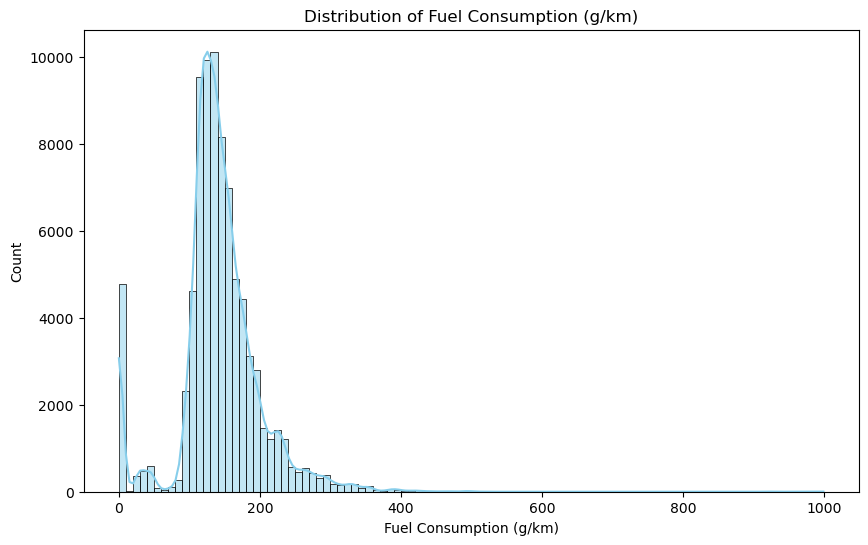

In [868]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_clean["fuel_consumption_g_km"], bins=100, kde=True, color="skyblue")
plt.title("Distribution of Fuel Consumption (g/km)")
plt.xlabel("Fuel Consumption (g/km)")
plt.ylabel("Count")
plt.show()


In [869]:
df_clean.loc[df_clean["fuel_consumption_g_km"] == 0, "fuel_consumption_g_km"] = np.nan

In [870]:
percentiles = df_clean["fuel_consumption_g_km"].quantile([0.90, 0.95, 0.99, 0.995, 0.999 ,0.9998 , 0.9999 ,1.0])
print(percentiles)

0.9000    209.500
0.9500    241.000
0.9900    325.000
0.9950    355.000
0.9990    435.000
0.9998    502.214
0.9999    920.000
1.0000    999.000
Name: fuel_consumption_g_km, dtype: float64


In [871]:
upper_cap = df_clean["fuel_consumption_g_km"].quantile(0.999)

extreme_rows = df_clean[df_clean["fuel_consumption_g_km"] > upper_cap]
extreme_rows.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,ev_range_km
717,ferrari,ferrari_599,black,07/2011,2011.0,209900.0,456,620,semi-automatic,petrol,"21,3 l/100 km",490.0,25950.0,"GTB Fiorano F1 ""HGTE""",0.0
1413,bentley,bentley_brooklands,grey,05/2010,2010.0,199990.0,395,537,automatic,petrol,"19,5 l/100 km",465.0,63815.0,| LIMITIERT 550 STK. | SCHECKHEFT,0.0
1419,lamborghini,lamborghini_murciélago,yellow,10/2001,2001.0,269800.0,426,579,manual,petrol,"21,5 l/100 km",500.0,138571.0,Murcielago Manual,0.0
2485,bentley,bentley_azure,black,07/2008,2008.0,124900.0,336,457,automatic,petrol,"19,5 l/100 km",465.0,29900.0,2 Mulliner Cabrio aus 2008,0.0
2660,ferrari,ferrari_360,black,07/2004,2004.0,89990.0,294,400,automatic,petrol,"17,9 l/100 km",440.0,57900.0,Spider F1 + Challenge + Carbon + Novitec +,0.0


In [872]:
upper_cap = df_clean["fuel_consumption_g_km"].quantile(0.9998)

extreme_rows = df_clean[df_clean["fuel_consumption_g_km"] > upper_cap]
print(extreme_rows.shape)
print(extreme_rows["model"])

(16, 15)
2918       ford_fiesta
11952         fiat_500
14311          mazda_2
15962      kia_picanto
19521      ford_fiesta
36272      ferrari_550
37539      ford_fiesta
43834        dodge_ram
45852      ford_fiesta
49115     hyundai_ix35
55963        dodge_ram
67972      ferrari_456
68352        dodge_ram
69109          mazda_2
72549      ford_fiesta
76090    ford_ecosport
Name: model, dtype: object


In [873]:
models = extreme_rows["model"].unique()
models

array(['ford_fiesta', 'fiat_500', 'mazda_2', 'kia_picanto', 'ferrari_550',
       'dodge_ram', 'hyundai_ix35', 'ferrari_456', 'ford_ecosport'],
      dtype=object)

In [874]:
upper_cap = df_clean["fuel_consumption_g_km"].quantile(0.9998)
for i in models :
    avg = df_clean[
        (df_clean["model"] == i) &
        (df_clean["fuel_consumption_g_km"] <= upper_cap)]["fuel_consumption_g_km"].mean()
    print(f"Model : {i} | Mean fuel Consumption : {avg}")

Model : ford_fiesta | Mean fuel Consumption : 119.5714908456844
Model : fiat_500 | Mean fuel Consumption : 110.60418168709445
Model : mazda_2 | Mean fuel Consumption : 116.50510204081633
Model : kia_picanto | Mean fuel Consumption : 108.92654028436019
Model : ferrari_550 | Mean fuel Consumption : nan
Model : dodge_ram | Mean fuel Consumption : 335.67808219178085
Model : hyundai_ix35 | Mean fuel Consumption : 162.90052356020942
Model : ferrari_456 | Mean fuel Consumption : nan
Model : ford_ecosport | Mean fuel Consumption : 127.91140596627757


In [875]:
upper_cap = df_clean["fuel_consumption_g_km"].quantile(0.9998)

for model in df_clean.loc[df_clean["fuel_consumption_g_km"] > upper_cap, "model"].unique():
    model_mean = df_clean.loc[
        (df_clean["model"] == model) & (df_clean["fuel_consumption_g_km"] <= upper_cap),
        "fuel_consumption_g_km"
    ].mean()
    
    if not np.isnan(model_mean):
        # Replace extreme values with model mean
        df_clean.loc[
            (df_clean["model"] == model) & (df_clean["fuel_consumption_g_km"] > upper_cap),
            "fuel_consumption_g_km"
        ] = model_mean
    else:
        # Drop rows where we can't compute a valid model mean
        df_clean = df_clean.drop(
            df_clean[(df_clean["model"] == model) & (df_clean["fuel_consumption_g_km"] > upper_cap)].index
        )


In [876]:
percentiles = df_clean["fuel_consumption_g_km"].quantile([0.90, 0.95, 0.99, 0.995, 0.999 ,0.9998 , 0.9999 ,1.0])
print(percentiles)

0.9000    209.0
0.9500    241.0
0.9900    325.0
0.9950    352.0
0.9990    423.0
0.9998    490.0
0.9999    495.0
1.0000    500.0
Name: fuel_consumption_g_km, dtype: float64


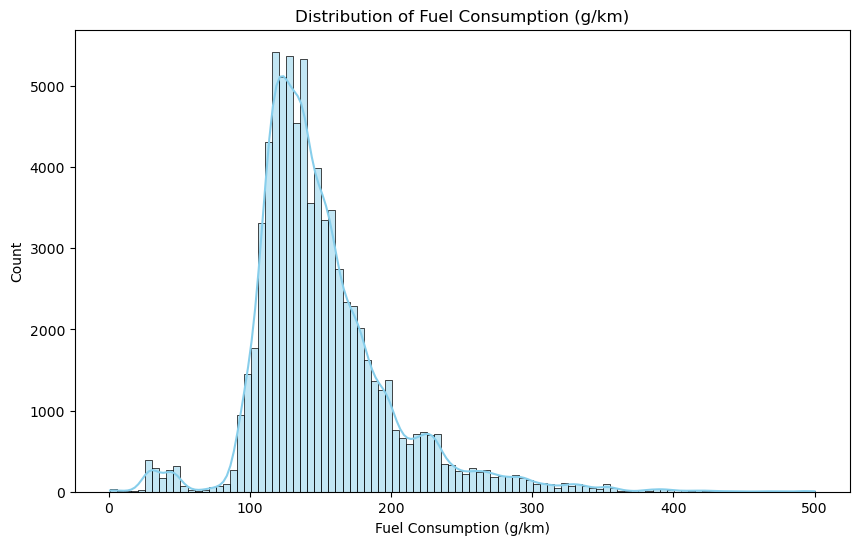

In [877]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean["fuel_consumption_g_km"], bins=100, kde=True, color="skyblue")
plt.title("Distribution of Fuel Consumption (g/km)")
plt.xlabel("Fuel Consumption (g/km)")
plt.ylabel("Count")
plt.show()


In [878]:
df_clean[df_clean["fuel_type"] == "hybrid"]["fuel_consumption_g_km"].isna().sum()

880

In [879]:

df_clean["fuel_consumption_g_km"] = df_clean.groupby(
    ["brand", "model", "year", "fuel_type"]
)["fuel_consumption_g_km"].transform(lambda x: x.fillna(x.mean()))


df_clean["fuel_consumption_g_km"] = df_clean.groupby(
    ["brand", "model", "fuel_type"]
)["fuel_consumption_g_km"].transform(lambda x: x.fillna(x.mean()))


df_clean["fuel_consumption_g_km"] = df_clean.groupby(
    ["brand", "fuel_type"]
)["fuel_consumption_g_km"].transform(lambda x: x.fillna(x.mean()))

#
df_clean["fuel_consumption_g_km"] = df_clean.groupby(
    ["fuel_type"]
)["fuel_consumption_g_km"].transform(lambda x: x.fillna(x.mean()))



In [880]:
fuel_types = ['hybrid', 'petrol', 'electric', 'diesel', 'lpg', 'diesel_hybrid',
       'cng', 'hydrogen', 'ethanol']

for i in fuel_types:
    print(f"Na values count for fuel {i}",df_clean[df_clean["fuel_type"] == i]["fuel_consumption_g_km"].isna().sum())
    

Na values count for fuel hybrid 0
Na values count for fuel petrol 0
Na values count for fuel electric 2440
Na values count for fuel diesel 0
Na values count for fuel lpg 0
Na values count for fuel diesel_hybrid 0
Na values count for fuel cng 0
Na values count for fuel hydrogen 0
Na values count for fuel ethanol 0


In [881]:
df_clean.loc[
    (df_clean["fuel_type"] == "electric") & (df_clean["fuel_consumption_g_km"].isna()),
    "fuel_consumption_g_km"
] = 0

In [882]:
df_clean["fuel_consumption_g_km"].isna().sum()

0

### 8) column ev_range_km

In [883]:
df_clean["ev_range_km"].describe()

count    94303.000000
mean         5.148033
std         44.412649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        614.000000
Name: ev_range_km, dtype: float64

In [884]:
df_clean["ev_range_km"].isna().sum()

5023

In [885]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].shape

(4262,)

In [886]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].isna().sum()

3808

In [887]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].isna().shape

(2440,)

In [888]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].isna().sum()

1215

In [889]:
df_clean["ev_range_km"] = df_clean.groupby(
    ["brand", "model", "year","fuel_type"]
)["ev_range_km"].transform(lambda x: x.fillna(x.mean()))

In [890]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].isna().sum()

1680

In [891]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].isna().sum()

96

In [892]:
df_clean["ev_range_km"] = df_clean.groupby(
    ["brand", "year","fuel_type"]
)["ev_range_km"].transform(lambda x: x.fillna(x.mean()))

In [893]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].isna().sum()

809

In [894]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].isna().sum()

43

In [895]:
df_clean["ev_range_km"] = df_clean.groupby(
    ["year","fuel_type"]
)["ev_range_km"].transform(lambda x: x.fillna(x.mean()))

In [896]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].isna().sum()

29

In [897]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].isna().sum()

19

In [898]:
df_clean["ev_range_km"] = df_clean.groupby(
    ["fuel_type"]
)["ev_range_km"].transform(lambda x: x.fillna(x.mean()))

In [899]:
df_clean[df_clean["fuel_type"] == "hybrid"]["ev_range_km"].isna().sum()

0

In [900]:
df_clean[df_clean["fuel_type"] == "electric"]["ev_range_km"].isna().sum()

0

In [901]:
df_clean["ev_range_km"].isna().sum()

0

### 9) Column offer_description

In [902]:
df_clean["offer_description"].unique()

array(['ST-Line Hybrid Adapt.LED+Head-Up-Display Klima',
       'blue Trend,Viele Extras,Top-Zustand',
       '35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21', ...,
       '1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *',
       'Lusso Ti 2.0 JTDM 16V Xenon Leder Navi',
       'Sportback1.5 Sport|VIRTUAL|NAVI|LED|30KM|'], dtype=object)

In [903]:
df_clean["offer_description"]

0          ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1                     blue Trend,Viele Extras,Top-Zustand
2            35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3                   2.0 Lifestyle Plus Automatik Navi FAP
4                            1.6 T 48V 2WD Spirit LED, WR
                               ...                       
99323          Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99324                         1.2 Lounge +Automatik + PDC
99325    1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99326              Lusso Ti 2.0 JTDM 16V Xenon Leder Navi
99327           Sportback1.5 Sport|VIRTUAL|NAVI|LED|30KM|
Name: offer_description, Length: 99326, dtype: object

In [904]:
df_clean = df_clean.drop(columns=["offer_description"])

### 10) Colum Color

In [905]:
df_clean["color"].unique()

array(['black', 'grey', 'red', 'white', 'blue', 'silver', 'brown',
       'green', 'orange', 'gold', 'yellow', 'violet', 'bronze', 'beige',
       nan], dtype=object)

In [906]:
df_clean["color"].isna().sum()

76

In [907]:
df_clean["color"] = df_clean.groupby(["brand", "model", "year"])["color"] \
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [908]:
df_clean["color"].isna().sum()

0

### 11) Column registration date

In [909]:
df_clean["registration_date"].unique()

array(['05/2023', '09/2018', '05/2021', '07/2018', '02/2023', '09/2009',
       '01/2023', '05/2019', '09/2012', '10/2022', '07/2009', '07/2022',
       '10/2018', '11/2016', '08/2005', '09/1999', '07/2015', '06/2019',
       '10/2004', '04/2018', '01/2020', '07/2021', '01/2018', '02/2016',
       '03/2023', '10/2011', '11/2019', '04/2017', '11/2018', '01/2010',
       '02/2019', '06/2016', '06/2023', '05/2018', '04/2021', '05/2020',
       '07/2013', '06/2005', '09/2017', '07/2010', '10/2017', '03/2016',
       '04/2019', '12/2018', '03/2021', '11/2011', '08/2017', '02/2014',
       '03/2014', '09/2015', '01/2011', '09/2020', '06/2010', '03/2013',
       '06/2018', '03/2019', '10/2015', '01/2022', '11/2017', '09/2016',
       '01/2015', '11/2009', '06/2022', '01/2017', '10/2012', '08/2018',
       '12/2022', '07/2019', '07/2020', '04/2011', '02/2020', '02/2021',
       '03/2017', '03/2010', '10/2020', '07/2017', '04/2015', '03/2015',
       '10/2013', '03/2012', '10/2007', '12/2011', 

In [910]:
df_clean["registration_date"] = pd.to_datetime(df_clean["registration_date"], format="%m/%Y", errors="coerce")
df_clean["registration_date"].unique()

<DatetimeArray>
['2023-05-01 00:00:00', '2018-09-01 00:00:00', '2021-05-01 00:00:00',
 '2018-07-01 00:00:00', '2023-02-01 00:00:00', '2009-09-01 00:00:00',
 '2023-01-01 00:00:00', '2019-05-01 00:00:00', '2012-09-01 00:00:00',
 '2022-10-01 00:00:00',
 ...
 '1995-05-01 00:00:00', '1995-09-01 00:00:00', '1995-10-01 00:00:00',
 '1996-10-01 00:00:00', '1995-02-01 00:00:00', '1996-09-01 00:00:00',
 '1995-11-01 00:00:00', '2023-11-01 00:00:00', '1995-01-01 00:00:00',
 '1995-08-01 00:00:00']
Length: 344, dtype: datetime64[ns]

In [911]:
df_clean["registration_date"].isna().sum()

0

### 12) Column year

In [912]:
df_clean["year"]

0        2023.0
1        2018.0
2        2021.0
3        2018.0
4        2023.0
          ...  
99323    2012.0
99324    2019.0
99325    2019.0
99326    2020.0
99327    2018.0
Name: year, Length: 99326, dtype: float64

In [913]:
df_clean["year"] = df_clean["year"].astype("Int64") 

### 13) Column power_kw

In [914]:
df_clean["power_kw"].unique()

array(['140', '49', '125', '114', '110', '103', '130', '88', '60', '67',
       '120', '290', '150', '77', '142', '74', '92', '245', '190', '118',
       '105', '85', '221', '195', '169', '147', '66', '104', '390', '70',
       '64', '295', '258', '272', '100', '127', '154', '177', '280',
       '185', '99', '132', '135', '121', '287', '155', '51', '95', '260',
       '441', '220', '530', '141', '200', '386', '73', '136', '375',
       '111', '268', nan, '145', '55', '240', '84', '210', '63', '225',
       '107', '206', '129', '294', '235', '257', '377', '184', '80', '52',
       '160', '33', '87', '202', '81', '180', '133', '230', '331', '44',
       '213', '62', '59', '61', '96', '97', '122', '310', '275', '108',
       '283', '338', '162', '156', '300', '360', '188', '445', '170',
       '255', '115', '50', '46', '134', '243', '165', '227', '250', '90',
       '515', '344', '317', '183', '309', '171', '423', '382', '381',
       '316', '176', '449', '460', '330', '467', '443', '427'

In [915]:
df_clean["power_kw"] = pd.to_numeric(df_clean["power_kw"], errors="coerce")

In [916]:
df_clean["power_kw"].describe()

count    99263.000000
mean       138.569316
std         78.467898
min          1.000000
25%         88.000000
50%        114.000000
75%        160.000000
max        678.000000
Name: power_kw, dtype: float64

In [917]:
percentiles = df_clean["fuel_consumption_g_km"].quantile([0.90, 0.95, 0.99, 0.995, 0.999 ,0.9998 , 0.9999 ,1.0])
print(percentiles)

0.9000    215.000000
0.9500    250.000000
0.9900    333.538462
0.9950    360.000000
0.9990    440.000000
0.9998    490.675000
0.9999    495.192857
1.0000    500.000000
Name: fuel_consumption_g_km, dtype: float64


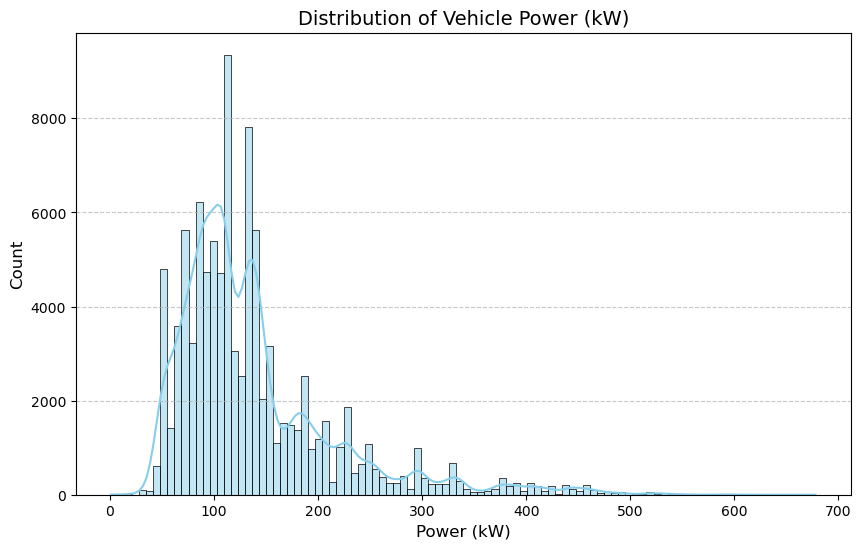

In [918]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_clean["power_kw"], bins=100, kde=True, color="skyblue", edgecolor="black")

plt.title("Distribution of Vehicle Power (kW)", fontsize=14)
plt.xlabel("Power (kW)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [919]:
lower_percentiles = df_clean["power_kw"].quantile([0.0001,0.0002,0.00025,0.00028,0.0003 ,0.0005,0.001, 0.005, 0.01, 0.05, 0.10])
print(lower_percentiles)

0.00010    18.85240
0.00020    19.00000
0.00025    25.81550
0.00028    32.58672
0.00030    33.00000
0.00050    33.00000
0.00100    33.00000
0.00500    44.00000
0.01000    49.00000
0.05000    54.00000
0.10000    66.00000
Name: power_kw, dtype: float64


In [920]:
lower_cap = 30  

df_clean.loc[df_clean["power_kw"] < lower_cap, "power_kw"] = np.nan

In [921]:
df_clean["power_kw"].isna().sum()

89

In [922]:
df_clean["power_kw"] = df_clean.groupby(
    ["brand", "model", "year", "fuel_type"]
)["power_kw"].transform(lambda x: x.fillna(x.mean()))

In [923]:
df_clean["power_kw"].isna().sum()

8

In [924]:
df_clean["power_kw"] = df_clean.groupby(
    ["brand", "model","fuel_type"]
)["power_kw"].transform(lambda x: x.fillna(x.mean()))

In [925]:
df_clean["power_kw"].isna().sum()

3

In [926]:
df_clean["power_kw"] = df_clean.groupby(
    ["fuel_type"]
)["power_kw"].transform(lambda x: x.fillna(x.mean()))

In [927]:
df_clean["power_kw"].isna().sum()

0

### 14) Column power_ps

In [928]:
df_clean["power_ps"].unique()

array(['190', '67', '170', '155', '150', '140', '177', '120', '82', '91',
       '163', '394', '204', '105', '193', '101', '125', '333', '258',
       '160', '143', '116', '300', '265', '230', '200', '90', '141',
       '530', '95', '87', '401', '351', '370', '136', '173', '209', '241',
       '381', '252', '135', '179', '184', '165', '390', '211', '69',
       '129', '354', '600', '299', '721', '192', '272', '525', '99',
       '185', '510', '151', '364', nan, '197', '75', '326', '114', '286',
       '86', '306', '145', '280', '175', '400', '320', '349', '513',
       '250', '109', '71', '218', '45', '118', '275', '110', '245', '181',
       '313', '450', '60', '290', '84', '80', '83', '131', '132', '166',
       '421', '374', '147', '385', '460', '220', '212', '408', '489',
       '256', '605', '231', '347', '156', '68', '63', '182', '330', '224',
       '309', '340', '122', '700', '468', '431', '249', '420', '232',
       '575', '519', '518', '430', '239', '610', '625', '449', '635'

In [929]:
df_clean = df_clean.drop(columns=["power_ps"])


### 15) Column fuel_consumption_l_100km

In [930]:
df_clean["fuel_consumption_l_100km"].unique()

array(['5,4 l/100 km', '4,6 l/100 km', nan, '7,5 l/100 km',
       '5,9 l/100 km', '6,7 l/100 km', '8,9 l/100 km', '5,6 l/100 km',
       '5 l/100 km', '7,4 l/100 km', '8,2 l/100 km', '9,4 l/100 km',
       '3,8 l/100 km', '5,3 l/100 km', '6,9 l/100 km', '7,2 l/100 km',
       '8,4 l/100 km', '4,7 l/100 km', '6,1 l/100 km', '6,3 l/100 km',
       '4,9 l/100 km', '4,8 l/100 km', '4,5 l/100 km', '6,2 l/100 km',
       '6,6 l/100 km', '9,3 l/100 km', '4,1 l/100 km', '8,3 l/100 km',
       '4,4 l/100 km', '9,9 l/100 km', '4,3 l/100 km', '6,4 l/100 km',
       '7,6 l/100 km', '7,9 l/100 km', '5,8 l/100 km', '2 l/100 km',
       '5,5 l/100 km', '5,2 l/100 km', '6 l/100 km', '6,8 l/100 km',
       '5,1 l/100 km', '7,8 l/100 km', '0 kWh/100 km', '3,9 l/100 km',
       '12,1 l/100 km', '12,7 l/100 km', '10,2 l/100 km', '1,8 l/100 km',
       '3,5 l/100 km', '8,1 l/100 km', '11 l/100 km', '16,9 l/100 km',
       '7,7 l/100 km', '6,5 l/100 km', '5,7 l/100 km', '7,1 l/100 km',
       '7 l/100 km',

In [931]:
fuel_counts = df_clean["fuel_type"].value_counts(dropna=False)
print(fuel_counts)

# Specifically for cng, lpg, hydrogen
special_fuels = ["cng", "lpg", "hydrogen"]
special_counts = df_clean[df_clean["fuel_type"].isin(special_fuels)]["fuel_type"].value_counts()
print("\nCounts of special fuels (cng / lpg / hydrogen):")
print(special_counts)

fuel_type
petrol           53866
diesel           37582
hybrid            4262
electric          2440
lpg                930
diesel_hybrid      137
cng                 61
hydrogen            39
ethanol              9
Name: count, dtype: int64

Counts of special fuels (cng / lpg / hydrogen):
fuel_type
lpg         930
cng          61
hydrogen     39
Name: count, dtype: int64


In [932]:
# Filter only LPG vehicles
lpg_vehicles = df_clean[df_clean["fuel_type"] == "lpg"]

# Count how many have fuel_consumption_l_100km recorded in kg
lpg_with_kg = lpg_vehicles["fuel_consumption_l_100km"].str.contains("kg", na=False).sum()

# Count total LPG
total_lpg = lpg_vehicles.shape[0]

print(f"Total LPG vehicles: {total_lpg}")
print(f"LPG vehicles with 'kg/100 km' values: {lpg_with_kg}")
print(f"Percentage: {lpg_with_kg / total_lpg * 100:.2f}%")


Total LPG vehicles: 930
LPG vehicles with 'kg/100 km' values: 10
Percentage: 1.08%


In [933]:
df_clean = df_clean.drop(columns=["fuel_consumption_l_100km"])

### 16) Column mileage_in_km

In [934]:
df_clean["mileage_in_km"].unique() 

array([  100., 27782.,  4247., ..., 21359., 31698., 52251.])

In [935]:
df_clean["mileage_in_km"].describe()

count    9.927900e+04
mean     8.604674e+04
std      7.932226e+04
min      0.000000e+00
25%      2.610350e+04
50%      6.876500e+04
75%      1.276000e+05
max      3.800000e+06
Name: mileage_in_km, dtype: float64

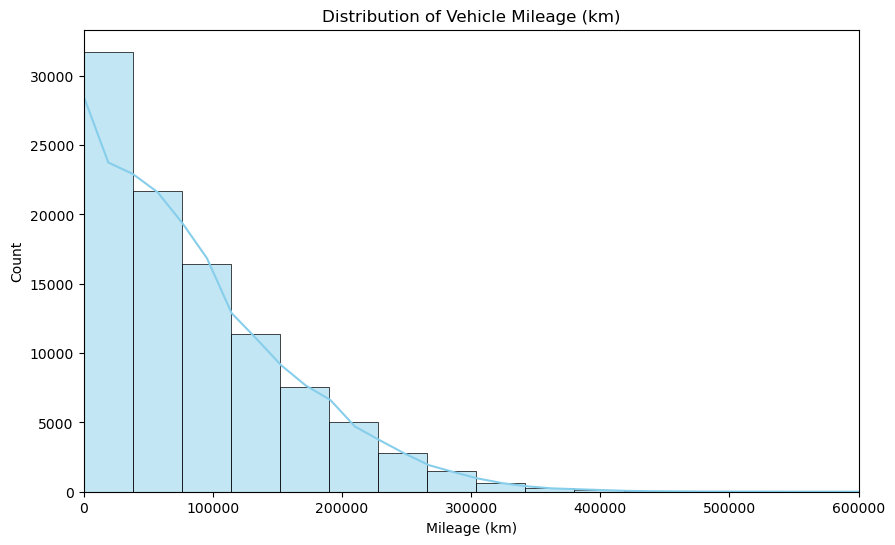

In [936]:

plt.figure(figsize=(10,6))
sns.histplot(df_clean["mileage_in_km"], bins=100, kde=True, color="skyblue")

plt.xlim(0, 600000)   # zoom in (since we know some cars have crazy values like 3.8M)
plt.title("Distribution of Vehicle Mileage (km)")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
plt.show()


In [937]:
percentiles = df_clean["mileage_in_km"].quantile([0.90, 0.95, 0.99, 0.995, 0.999,0.9996,0.9997,0.9998, 0.99985,0.9999, 1.0])
print(percentiles.apply(lambda x: f"{x:,.0f}"))


0.90000      193,000
0.95000      232,000
0.99000      309,155
0.99500      340,000
0.99900      415,000
0.99960      483,554
0.99970      510,512
0.99980      731,179
0.99985    1,011,912
0.99990    1,628,288
1.00000    3,800,000
Name: mileage_in_km, dtype: object


In [938]:
upper_cap = df_clean["mileage_in_km"].quantile(0.9998)

# Filter rows above that threshold
extreme_mileage = df_clean[df_clean["mileage_in_km"] > upper_cap]

print("Threshold (0.9998):", upper_cap)
print("Number of extreme vehicles:", len(extreme_mileage))
extreme_mileage.head(20)  # Show first 20 rows for preview

Threshold (0.9998): 731178.824400022
Number of extreme vehicles: 20


,brand,model,color,registration_date,year,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_g_km,mileage_in_km,ev_range_km
10829,bmw,bmw_x3,silver,2007-01-01,2007,3950.0,286.0,automatic,diesel,202.761905,1604000.0,0.0
22427,bmw,bmw_520,grey,2012-02-01,2012,15000.0,135.0,manual,diesel,125.000000,2223400.0,0.0
23152,ford,ford_mustang,beige,2008-01-01,2008,4900.0,157.0,automatic,petrol,298.000000,999999.0,0.0
29777,audi,audi_a5,black,2009-05-01,2009,10000.0,132.0,manual,petrol,149.000000,1940395.0,0.0
34720,audi,audi_a6-allroad,black,2001-12-01,2001,6657.0,184.0,automatic,lpg,322.000000,999999.0,0.0
41846,ford,ford_fiesta,white,2010-12-01,2010,4500.0,44.0,manual,petrol,132.978723,1110000.0,0.0
49637,ford,ford_galaxy,black,2003-11-01,2003,1600.0,85.0,manual,diesel,178.000000,2830000.0,0.0
50883,ford,ford_transit,white,2014-10-01,2014,9600.0,92.0,manual,diesel,212.000000,3800000.0,0.0
51637,audi,audi_q5,black,2015-09-01,2015,26500.0,190.0,automatic,diesel,156.000000,1360000.0,0.0
54167,ford,ford_fiesta,black,2004-02-01,2004,1500.0,50.0,manual,diesel,122.000000,2580000.0,0.0


In [939]:
# Step 1: Define threshold
upper_cap = df_clean["mileage_in_km"].quantile(0.9998)

# Step 2: Get extreme rows (above threshold)
extreme_mileage = df_clean[df_clean["mileage_in_km"] > upper_cap]

# Step 3: Calculate mean mileage for each (model, year) below threshold
avg_by_model_year = (
    df_clean[df_clean["mileage_in_km"] <= upper_cap]
    .groupby(["model", "year"])["mileage_in_km"]
    .mean()
    .reset_index()
    .rename(columns={"mileage_in_km": "avg_mileage_below_threshold"})
)

# Step 4: Merge averages back into extreme vehicles
extreme_with_avg = extreme_mileage.merge(
    avg_by_model_year,
    on=["model", "year"],
    how="left"
)

print(extreme_with_avg[["model", "year", "mileage_in_km", "avg_mileage_below_threshold"]].head(20))


              model  year  mileage_in_km  avg_mileage_below_threshold
0            bmw_x3  2007      1604000.0                188522.818182
1           bmw_520  2012      2223400.0                187645.023256
2      ford_mustang  2008       999999.0                 64511.000000
3           audi_a5  2009      1940395.0                173339.051282
4   audi_a6-allroad  2001       999999.0                          NaN
5       ford_fiesta  2010      1110000.0                129833.492754
6       ford_galaxy  2003      2830000.0                233527.428571
7      ford_transit  2014      3800000.0                164588.400000
8           audi_q5  2015      1360000.0                128979.287500
9       ford_fiesta  2004      2580000.0                169653.467742
10          bmw_520  1998       999999.0                253252.555556
11       fiat_doblo  2022      2300000.0                  1414.185185
12   citroen_jumper  2013       735201.0                155937.111111
13          bmw_323 

In [940]:
# Step 1: Define threshold
upper_cap = df_clean["mileage_in_km"].quantile(0.9998)

# Step 2: Calculate avg mileage per model-year below threshold
avg_by_model_year = (
    df_clean[df_clean["mileage_in_km"] <= upper_cap]
    .groupby(["model", "year"])["mileage_in_km"]
    .mean()
    .reset_index()
    .rename(columns={"mileage_in_km": "avg_mileage_below_threshold"})
)

# Step 3: Merge averages
df_clean = df_clean.merge(avg_by_model_year, on=["model", "year"], how="left")

# ✅ Step 4: Replace extreme mileage with the average
df_clean.loc[df_clean["mileage_in_km"] > upper_cap, "mileage_in_km"] = \
    df_clean.loc[df_clean["mileage_in_km"] > upper_cap, "avg_mileage_below_threshold"]

# Step 5: Drop helper column
df_clean = df_clean.drop(columns=["avg_mileage_below_threshold"])

# Check again: now extreme values should be replaced
print(df_clean[df_clean["mileage_in_km"] > upper_cap])


Empty DataFrame
Columns: [brand, model, color, registration_date, year, price_in_euro, power_kw, transmission_type, fuel_type, fuel_consumption_g_km, mileage_in_km, ev_range_km]
Index: []


In [941]:
low_percentiles = df_clean["mileage_in_km"].quantile([0.01, 0.05,0.078,0.08,0.081,0.082, 0.085,0.09, 0.10 , 0.2 , 0.3 ])
print(low_percentiles.apply(lambda x: f"{x:,.0f}"))

0.010         9
0.050        20
0.078       150
0.080       350
0.081       500
0.082       526
0.085     1,000
0.090     1,500
0.100     2,605
0.200    18,027
0.300    34,795
Name: mileage_in_km, dtype: object


In [942]:
lower_cap = 500  # chosen based on low percentile analysis
df_clean.loc[df_clean["mileage_in_km"] < lower_cap, "mileage_in_km"] = np.nan


In [943]:
df_clean["mileage_in_km"].isna().sum()

8054

In [944]:
df_clean["mileage_in_km"] = df_clean.groupby(["model", "year"])["mileage_in_km"].transform(
    lambda x: x.fillna(x.mean())
)

In [945]:
df_clean["mileage_in_km"].isna().sum()

137

In [946]:
df_clean["mileage_in_km"] = df_clean.groupby(["year"])["mileage_in_km"].transform(
    lambda x: x.fillna(x.mean())
)

In [947]:
df_clean["mileage_in_km"].isna().sum()

0

----

In [948]:
df_clean.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'transmission_type', 'fuel_type', 'fuel_consumption_g_km',
       'mileage_in_km', 'ev_range_km'],
      dtype='object')

In [949]:
df_clean.isna().sum()

brand                    0
model                    0
color                    0
registration_date        0
year                     0
price_in_euro            0
power_kw                 0
transmission_type        0
fuel_type                0
fuel_consumption_g_km    0
mileage_in_km            0
ev_range_km              0
dtype: int64

In [950]:
df_clean.shape

(99326, 12)

In [951]:
df_clean.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_g_km,mileage_in_km,ev_range_km
0,ford,ford_kuga,black,2023-05-01,2023,38490.0,140.0,automatic,hybrid,124.0,3098.711538,74.611111
1,hyundai,hyundai_i10,black,2018-09-01,2018,11555.0,49.0,manual,petrol,106.0,27782.000000,0.000000
2,audi,audi_q4-e-tron,grey,2021-05-01,2021,48886.0,125.0,automatic,electric,0.0,4247.000000,402.687500
3,honda,honda_cr-v,red,2018-07-01,2018,24490.0,114.0,automatic,petrol,175.0,57000.000000,0.000000
4,kia,kia_sportage,black,2023-02-01,2023,34990.0,110.0,manual,petrol,150.0,7500.000000,0.000000


## 4. Feature Engineering

In [952]:
data_collection_year = df_clean["year"].max()

df_clean["vehicle_manufacturing_age"] = data_collection_year - df_clean["year"].astype(int)

df_clean["registration_month"] = df_clean["registration_date"].dt.month
df_clean["registration_year"] = df_clean["registration_date"].dt.year

df_clean["vehicle_registration_age"] = data_collection_year - df_clean["registration_year"]

df_clean["reg_month_sin"] = np.sin(2 * np.pi * df_clean["registration_month"] / 12)
df_clean["reg_month_cos"] = np.cos(2 * np.pi * df_clean["registration_month"] / 12)


df_clean = df_clean.drop(columns=["registration_date", "registration_month" ,"year" ,"registration_year"])


In [953]:
# create a new column as mileage per year
df_clean["mileage_per_year"] = df_clean.apply(
    lambda row: row["mileage_in_km"] / row["vehicle_registration_age"] if row["vehicle_registration_age"] > 0 else row["mileage_in_km"],
    axis=1
)
df_clean["mileage_per_year"] = df_clean["mileage_per_year"].round(2)

In [954]:
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['brand', 'model', 'color', 'transmission_type', 'fuel_type']


In [955]:
df_clean["model"].unique()

array(['ford_kuga', 'hyundai_i10', 'audi_q4-e-tron', 'honda_cr-v',
       'kia_sportage', 'honda_civic', 'hyundai_staria', 'hyundai_kona',
       'ford_fiesta', 'dacia_sandero', 'bmw_520', 'bmw_x5',
       'citroen_spacetourer', 'audi_a5', 'audi_a3', 'kia_kia',
       'alfa-romeo_147', 'audi_a4', 'ford_focus', 'ford_ecosport',
       'ford_transit', 'audi_a6', 'hyundai_ioniq', 'audi_q5',
       'land-rover_range-rover-sport', 'kia_xceed', 'bmw_x1',
       'hyundai_tucson', 'jaguar_f-pace', 'bmw_730', 'bmw_118',
       'land-rover_range-rover-evoque', 'audi_a1', 'kia_optima',
       'bmw_550', 'bmw_114', 'dodge_ram', 'ford_s-max', 'audi_a8',
       'bmw_m2', 'audi_q3', 'bmw_218', 'fiat_124-spider', 'bmw_225',
       'mazda_cx-7', 'alfa-romeo_stelvio', 'ford_c-max', 'bmw_430',
       'hyundai_i40', 'citroen_c5-aircross', 'bmw_525', 'isuzu_d-max',
       'alfa-romeo_giulietta', 'bmw_x3', 'dacia_duster', 'mazda_cx-5',
       'bmw_i3', 'bmw_x6', 'ford_f150', 'jeep_compass', 'mazda_cx-3',
  

In [956]:
df_clean.head()

,brand,model,color,price_in_euro,power_kw,transmission_type,fuel_type,fuel_consumption_g_km,mileage_in_km,ev_range_km,vehicle_manufacturing_age,vehicle_registration_age,reg_month_sin,reg_month_cos,mileage_per_year
0,ford,ford_kuga,black,38490.0,140.0,automatic,hybrid,124.0,3098.711538,74.611111,0,0,0.500000,-8.660254e-01,3098.71
1,hyundai,hyundai_i10,black,11555.0,49.0,manual,petrol,106.0,27782.000000,0.000000,5,5,-1.000000,-1.836970e-16,5556.40
2,audi,audi_q4-e-tron,grey,48886.0,125.0,automatic,electric,0.0,4247.000000,402.687500,2,2,0.500000,-8.660254e-01,2123.50
3,honda,honda_cr-v,red,24490.0,114.0,automatic,petrol,175.0,57000.000000,0.000000,5,5,-0.500000,-8.660254e-01,11400.00
4,kia,kia_sportage,black,34990.0,110.0,manual,petrol,150.0,7500.000000,0.000000,0,0,0.866025,5.000000e-01,7500.00


In [957]:
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['brand', 'model', 'color', 'transmission_type', 'fuel_type']


In [958]:
cat_cols = ['brand', 'color', 'transmission_type', 'fuel_type']

In [959]:
df_clean2 = pd.get_dummies(df_clean , columns = cat_cols , drop_first= True , dtype = int)
df_clean2.head()

,model,price_in_euro,power_kw,fuel_consumption_g_km,mileage_in_km,ev_range_km,vehicle_manufacturing_age,vehicle_registration_age,reg_month_sin,reg_month_cos,...,transmission_type_manual,transmission_type_semi-automatic,fuel_type_diesel,fuel_type_diesel_hybrid,fuel_type_electric,fuel_type_ethanol,fuel_type_hybrid,fuel_type_hydrogen,fuel_type_lpg,fuel_type_petrol
0,ford_kuga,38490.0,140.0,124.0,3098.711538,74.611111,0,0,0.500000,-8.660254e-01,...,0,0,0,0,0,0,1,0,0,0
1,hyundai_i10,11555.0,49.0,106.0,27782.000000,0.000000,5,5,-1.000000,-1.836970e-16,...,1,0,0,0,0,0,0,0,0,1
2,audi_q4-e-tron,48886.0,125.0,0.0,4247.000000,402.687500,2,2,0.500000,-8.660254e-01,...,0,0,0,0,1,0,0,0,0,0
3,honda_cr-v,24490.0,114.0,175.0,57000.000000,0.000000,5,5,-0.500000,-8.660254e-01,...,0,0,0,0,0,0,0,0,0,1
4,kia_sportage,34990.0,110.0,150.0,7500.000000,0.000000,0,0,0.866025,5.000000e-01,...,1,0,0,0,0,0,0,0,0,1


In [960]:
print(df_clean2.columns)

Index(['model', 'price_in_euro', 'power_kw', 'fuel_consumption_g_km',
       'mileage_in_km', 'ev_range_km', 'vehicle_manufacturing_age',
       'vehicle_registration_age', 'reg_month_sin', 'reg_month_cos',
       'mileage_per_year', 'brand_aston-martin', 'brand_audi', 'brand_bentley',
       'brand_bmw', 'brand_cadillac', 'brand_chevrolet', 'brand_chrysler',
       'brand_citroen', 'brand_dacia', 'brand_daewoo', 'brand_daihatsu',
       'brand_dodge', 'brand_ferrari', 'brand_fiat', 'brand_ford',
       'brand_honda', 'brand_hyundai', 'brand_infiniti', 'brand_isuzu',
       'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_lada',
       'brand_lamborghini', 'brand_lancia', 'brand_land-rover',
       'brand_maserati', 'brand_mazda', 'color_black', 'color_blue',
       'color_bronze', 'color_brown', 'color_gold', 'color_green',
       'color_grey', 'color_orange', 'color_red', 'color_silver',
       'color_violet', 'color_white', 'color_yellow',
       'transmission_type_manual', 'transm

In [961]:
df_clean2.head()

,model,price_in_euro,power_kw,fuel_consumption_g_km,mileage_in_km,ev_range_km,vehicle_manufacturing_age,vehicle_registration_age,reg_month_sin,reg_month_cos,...,transmission_type_manual,transmission_type_semi-automatic,fuel_type_diesel,fuel_type_diesel_hybrid,fuel_type_electric,fuel_type_ethanol,fuel_type_hybrid,fuel_type_hydrogen,fuel_type_lpg,fuel_type_petrol
0,ford_kuga,38490.0,140.0,124.0,3098.711538,74.611111,0,0,0.500000,-8.660254e-01,...,0,0,0,0,0,0,1,0,0,0
1,hyundai_i10,11555.0,49.0,106.0,27782.000000,0.000000,5,5,-1.000000,-1.836970e-16,...,1,0,0,0,0,0,0,0,0,1
2,audi_q4-e-tron,48886.0,125.0,0.0,4247.000000,402.687500,2,2,0.500000,-8.660254e-01,...,0,0,0,0,1,0,0,0,0,0
3,honda_cr-v,24490.0,114.0,175.0,57000.000000,0.000000,5,5,-0.500000,-8.660254e-01,...,0,0,0,0,0,0,0,0,0,1
4,kia_sportage,34990.0,110.0,150.0,7500.000000,0.000000,0,0,0.866025,5.000000e-01,...,1,0,0,0,0,0,0,0,0,1


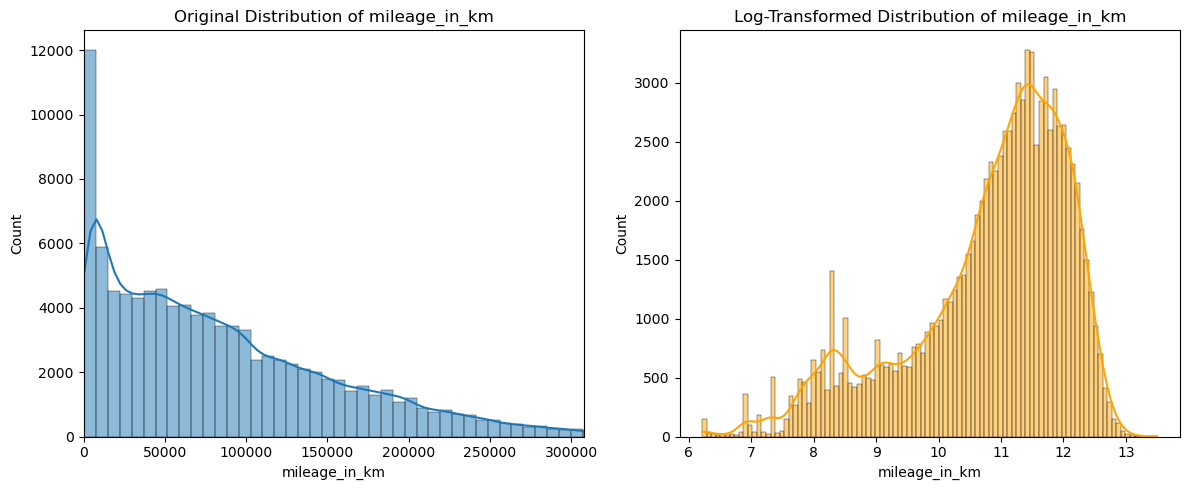

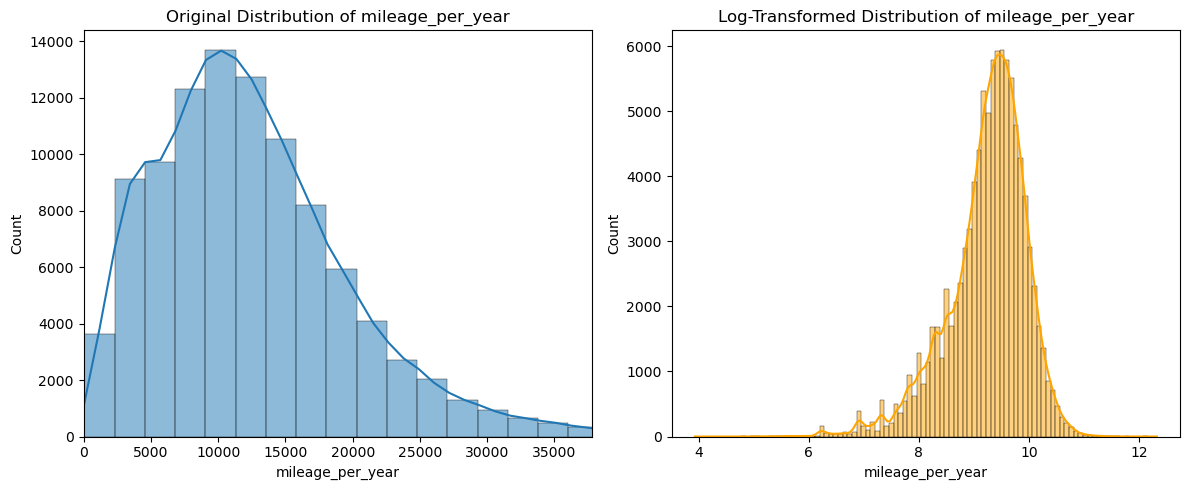

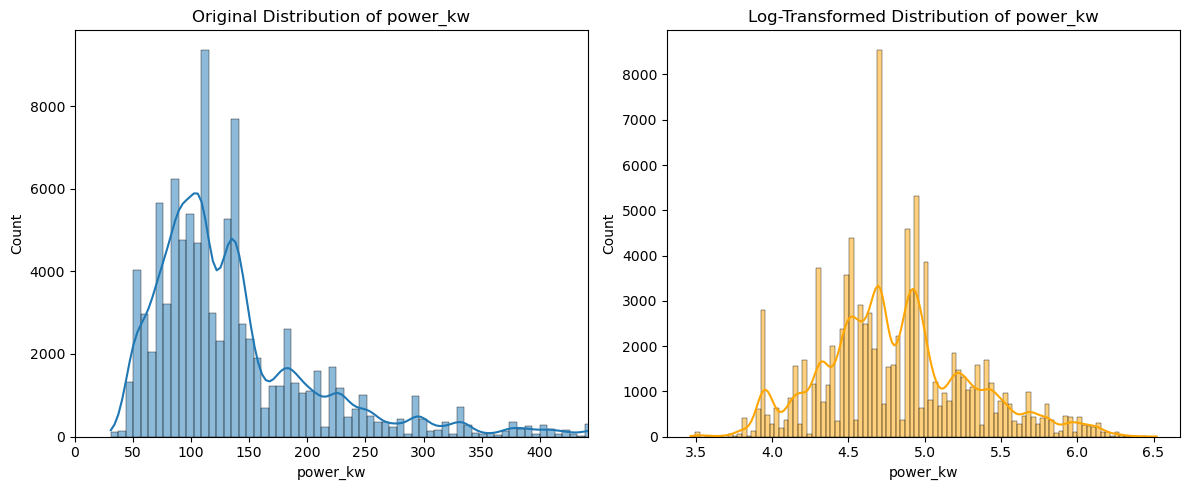

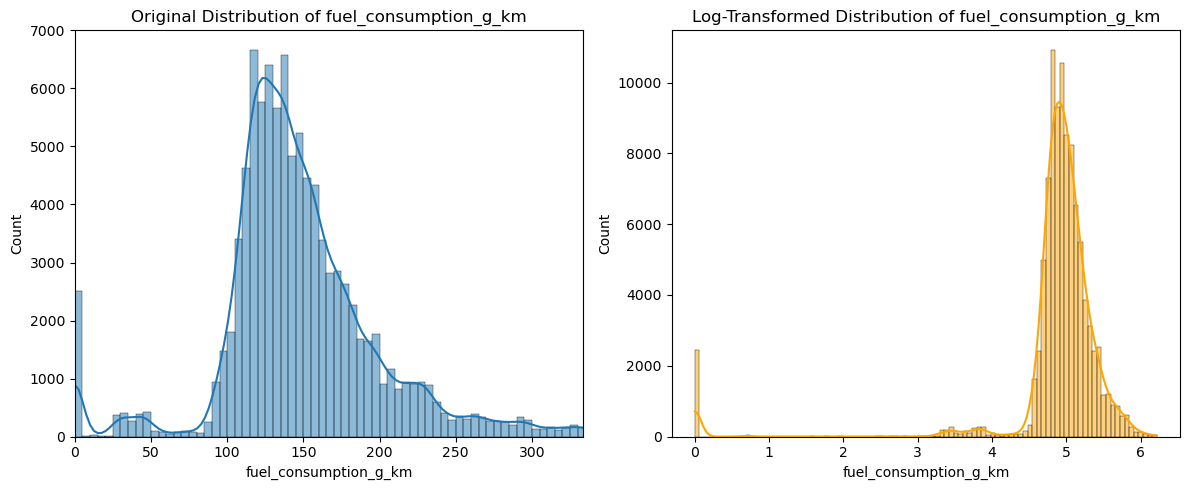

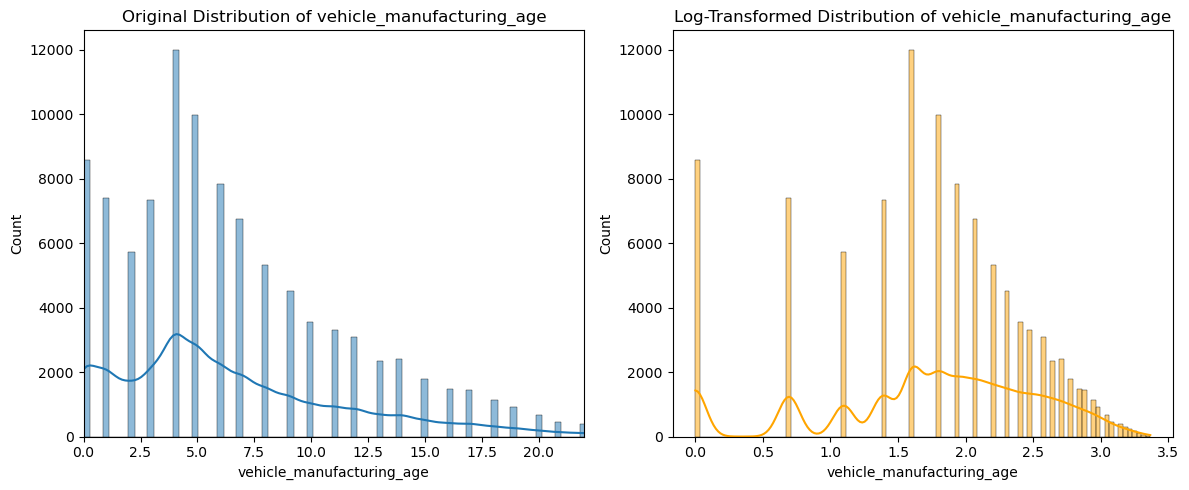

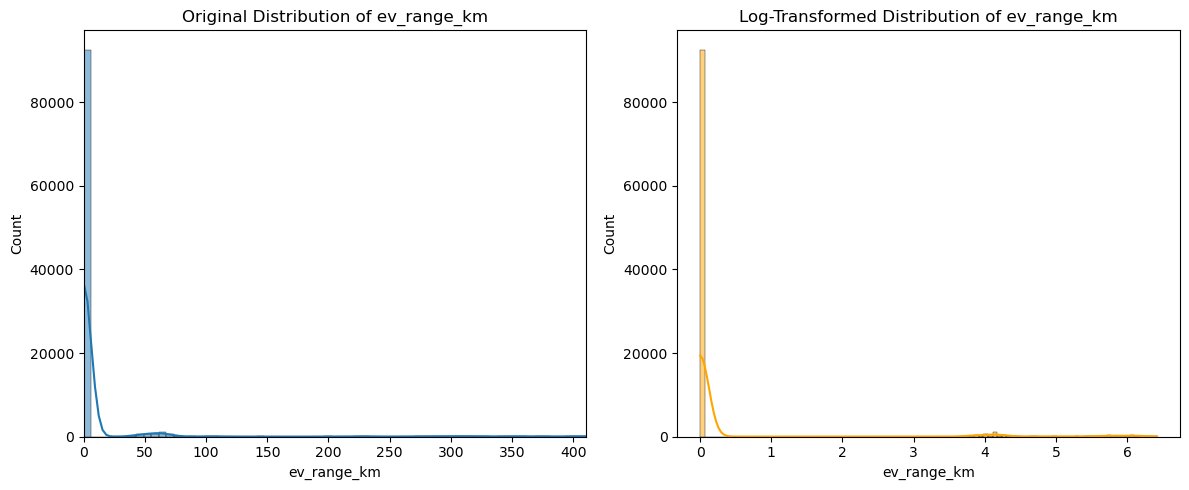

In [962]:

# Columns to test
cols_to_check = ["mileage_in_km","mileage_per_year","power_kw","fuel_consumption_g_km","vehicle_manufacturing_age","ev_range_km"]

for col in cols_to_check:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original distribution
    sns.histplot(df_clean[col].dropna(), bins=100, kde=True, ax=axes[0])
    axes[0].set_title(f"Original Distribution of {col}")
    axes[0].set_xlim(0, df_clean[col].quantile(0.99))  # zoom in (ignore extreme outliers)

    # Log-transformed distribution (without modifying df_clean)
    sns.histplot(np.log1p(df_clean[col].dropna()), bins=100, kde=True, ax=axes[1], color="orange")
    axes[1].set_title(f"Log-Transformed Distribution of {col}")

    plt.tight_layout()
    plt.show()


In [963]:
X = df_clean2.drop("price_in_euro", axis=1)
y = df_clean2["price_in_euro"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [964]:
X_train.shape

(79460, 61)

from sklearn.model_selection import KFold
import numpy as np

# Reset index so that kfold indices align with loc
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train["model_target_enc"] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train):
    train, val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    mapping = train.join(y_train.iloc[train_idx]).groupby("model")["price_in_euro"].mean()
    
    # use iloc for assignment
    X_train.loc[val_idx, "model_target_enc"] = val["model"].map(mapping)

model_target_mapping = (
    X_train.join(y_train)
    .groupby("model")["model_target_enc"]
    .mean()
    .reset_index()   # keep 'model' as a column
)

# Global mean for unseen models
global_mean = y_train.mean()

# Fill NaNs in train encoding
X_train["model_target_enc"].fillna(global_mean, inplace=True)

# Transform test set using train mapping
mapping = X_train.join(y_train).groupby("model")["model_target_enc"].mean()
X_test["model_target_enc"] = X_test["model"].map(mapping)
X_test["model_target_enc"].fillna(global_mean, inplace=True)

# Drop raw model col
X_train = X_train.drop(columns=["model"])
X_test = X_test.drop(columns=["model"])


In [965]:
from sklearn.model_selection import KFold
import numpy as np

# Reset index so that kfold indices align with loc
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Add placeholder for encoded values
X_train["model_target_enc"] = np.nan

# KFold target encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train):
    train, val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    mapping = (
        train.join(y_train.iloc[train_idx])
        .groupby("model")["price_in_euro"]
        .mean()
    )
    X_train.loc[val_idx, "model_target_enc"] = val["model"].map(mapping)

# Create model_target_mapping dataframe
model_target_mapping = (
    X_train.join(y_train)
    .groupby("model")["model_target_enc"]
    .mean()
    .reset_index()
)

# ---- Split brand and model ONLY in model_target_mapping ----
model_target_mapping[["brand", "model"]] = model_target_mapping["model"].str.split("_", n=1, expand=True)

# Reorder columns for clarity
model_target_mapping = model_target_mapping[["brand", "model", "model_target_enc"]]

# Global mean for unseen models
global_mean = y_train.mean()

# Fill NaNs in train encoding
X_train["model_target_enc"].fillna(global_mean, inplace=True)

# Transform test set using train mapping
mapping = (
    X_train.join(y_train)
    .groupby("model")["model_target_enc"]
    .mean()
)
X_test["model_target_enc"] = X_test["model"].map(mapping)
X_test["model_target_enc"].fillna(global_mean, inplace=True)

# Drop raw model col from train/test (keep only encoded version)
X_train = X_train.drop(columns=["model"])
X_test = X_test.drop(columns=["model"])


In [966]:
X_train.shape

(79460, 61)

In [967]:
log_scale_cols = ["power_kw","fuel_consumption_g_km","mileage_in_km"]
direct_scale_cols =["ev_range_km","vehicle_manufacturing_age","vehicle_registration_age"]
passthrough_cols = ["reg_month_sin", "reg_month_cos", "model_target_enc"]

In [968]:
# All columns in training set (before scaling)
all_cols = X_train.columns.tolist()

# Combine scaled columns
scaled_cols = log_scale_cols + direct_scale_cols

# Get the rest = one-hot encoded categorical + passthrough features
not_scale_cols = [col for col in all_cols if col not in scaled_cols and col != "price_in_euro"]

print("Not Scaled Columns (OHE + passthrough):")
print(not_scale_cols)
print("Count:", len(not_scale_cols))


Not Scaled Columns (OHE + passthrough):
['reg_month_sin', 'reg_month_cos', 'mileage_per_year', 'brand_aston-martin', 'brand_audi', 'brand_bentley', 'brand_bmw', 'brand_cadillac', 'brand_chevrolet', 'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo', 'brand_daihatsu', 'brand_dodge', 'brand_ferrari', 'brand_fiat', 'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_infiniti', 'brand_isuzu', 'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_lada', 'brand_lamborghini', 'brand_lancia', 'brand_land-rover', 'brand_maserati', 'brand_mazda', 'color_black', 'color_blue', 'color_bronze', 'color_brown', 'color_gold', 'color_green', 'color_grey', 'color_orange', 'color_red', 'color_silver', 'color_violet', 'color_white', 'color_yellow', 'transmission_type_manual', 'transmission_type_semi-automatic', 'fuel_type_diesel', 'fuel_type_diesel_hybrid', 'fuel_type_electric', 'fuel_type_ethanol', 'fuel_type_hybrid', 'fuel_type_hydrogen', 'fuel_type_lpg', 'fuel_type_petrol', 'model_target_enc'

In [969]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("log_scale", Pipeline([
            ("log", log_transformer),
            ("scaler", StandardScaler())
        ]), log_scale_cols),
        
        ("direct_scale", StandardScaler(), direct_scale_cols),
        
        # Not scaling ones are passed through
        ("passthrough", "passthrough", not_scale_cols)
    ],
    remainder="drop",   # drop any extra cols not listed
    verbose_feature_names_out=False  # 👈 disables prefixing
)

# Ensure pandas DataFrame output
preprocessor.set_output(transform="pandas")


ColumnTransformer(transformers=[('log_scale',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['power_kw', 'fuel_consumption_g_km',
                                  'mileage_in_km']),
                                ('direct_scale', StandardScaler(),
                                 ['ev_range_km', 'vehicle_manufacturing_age',
                                  'vehicle_registration_age']),
                                ('passthrough', 'passthrough',
                                 ['reg_month_sin', 'reg_...
                                  'brand_chrysler', 'brand_citroen',
                                  'brand_dacia', 'brand_daewoo',
                                  'brand_daihatsu', 'brand_dodge',
                                  'brand_ferrari', 'brand_fiat', 'brand_ford',
                                  'brand_honda', 'brand_hyundai',
                                  'brand_infiniti', 'brand_isuzu',
                                  'brand_jaguar', 'brand_jeep', 'brand_kia',
                                  'brand_lada', 'brand_lamborghini',
                                  'brand_lancia', 'brand_land-rover',
                                  'brand_maserati', ...])],
                  verbose_feature_names_out=False)

In [970]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled  = preprocessor.transform(X_test)


In [971]:
X_train_scaled.head()

,power_kw,fuel_consumption_g_km,mileage_in_km,ev_range_km,vehicle_manufacturing_age,vehicle_registration_age,reg_month_sin,reg_month_cos,mileage_per_year,brand_aston-martin,...,transmission_type_semi-automatic,fuel_type_diesel,fuel_type_diesel_hybrid,fuel_type_electric,fuel_type_ethanol,fuel_type_hybrid,fuel_type_hydrogen,fuel_type_lpg,fuel_type_petrol,model_target_enc
0,-1.257251,0.107083,0.324312,-0.197433,0.270262,0.270262,-5.000000e-01,-0.866025,9343.12,0,...,0,0,0,0,0,0,0,0,1,28528.211111
1,1.474533,0.721307,-0.812817,-0.197433,-0.499453,-0.499453,5.000000e-01,-0.866025,4250.00,0,...,0,0,0,0,0,0,0,0,1,32774.311111
2,2.731971,0.831753,-1.259641,-0.197433,-1.076739,-1.076739,1.224647e-16,-1.000000,9500.00,0,...,0,0,0,0,0,0,0,0,1,18925.400000
3,-1.781470,-0.370097,-0.369090,-0.197433,-0.691881,-0.691881,-5.000000e-01,0.866025,10099.33,0,...,0,0,0,0,0,0,0,0,1,26087.430956
4,-1.742072,-0.050408,-0.284079,-0.197433,-0.499453,-0.499453,5.000000e-01,0.866025,8461.25,0,...,0,0,0,0,0,0,0,0,1,26472.971429


In [972]:
X_train_scaled.shape

(79460, 61)

In [973]:
train_final = X_train_scaled.copy()
train_final["price_in_euro"] = y_train.values

In [974]:
test_final = X_test_scaled.copy()
test_final["price_in_euro"] = y_test.values

In [975]:
train_final.to_csv("train_final.csv", index=False)
test_final.to_csv("test_final.csv", index=False)

In [976]:
log_pipeline = preprocessor.named_transformers_["log_scale"]

log_transformer = log_pipeline.named_steps["log"]
log_scaler = log_pipeline.named_steps["scaler"]

direct_scaler = preprocessor.named_transformers_["direct_scale"]




In [977]:
model_target_mapping.to_csv("artifacts/model_target_mapping.csv", index=False)

In [978]:
import joblib

joblib.dump(log_scaler, "artifacts/log_scaler.joblib")
joblib.dump(direct_scaler, "artifacts/direct_scaler.joblib")
joblib.dump(log_transformer, "artifacts/log_transformer.joblib")  # though this is usually just np.log1p


['artifacts/log_transformer.joblib']

In [980]:
feature_order = X_train.columns.tolist()

In [981]:
joblib.dump(feature_order, "artifacts/feature_order.joblib")

['artifacts/feature_order.joblib']

In [979]:
print("joblib:", joblib.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)


scikit-learn: 1.5.1
joblib: 1.4.2
xgboost: 3.0.5
numpy: 1.26.4
pandas: 2.2.2
